# Advanced Regression Assignment

### Problem Statement:

A US-based housing company 'Suprise Housing' has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher rate.

A model is to be built using regression to predict the actual value of the prospective properties and decide wether to in invest in them or not.

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
original_dataset = pd.read_csv('train.csv')
original_dataset.shape

(1460, 81)

In [3]:
# Creating a copy of the original dataset to work on
houses = original_dataset.copy()
houses.shape

(1460, 81)

In [4]:
# Tweaking the default display parameters
pd.options.display.max_columns = 440
pd.options.display.max_rows = 440

### Data Exploration and Understanding

In [5]:
# Viweing the first 5 records in the dataframe
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Running .info(), to get a general idea about the data 
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Running .describe on the dataframe
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Checking the precentage of null values present
def null_percentage(df=houses, cut_off=0):
    """
        Return the columns with null percentage greater than the cut_off in the dataframe
        The default cut_off is set to 0 and df is set to houses
    """
    null_perc = round(100 * (houses.isnull().sum() / len(houses.index)), 2)
    return null_perc[null_perc > cut_off]

In [9]:
null_percentage()

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

### Cleaning the dataset

In [10]:
# dropping the 'Id' column
houses.drop(['Id'], axis=1, inplace=True)
houses.shape

(1460, 80)

In [11]:
# Checking for columns with unique values less than 2
unique_values = houses.nunique()
unique_values[unique_values < 2]

Series([], dtype: int64)

In [12]:
# Columns with more than 10% null values
null_15 = null_percentage(cut_off=10)
null_15

LotFrontage    17.74
Alley          93.77
FireplaceQu    47.26
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

In [13]:
# Dropping columns with more than 10% null values
to_drop = list(null_15.index)
print(f"Columns to be dropped: {', '.join(col for col in to_drop)}.")

houses.drop(to_drop, axis=1, inplace=True)
houses.shape

Columns to be dropped: LotFrontage, Alley, FireplaceQu, PoolQC, Fence, MiscFeature.


(1460, 74)

In [14]:
null_present = null_percentage()
null_present

MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64

In [15]:
# Running .describe() on the columns that have null values to better understand the what can be done
for column in list(null_present.index):
    print(f"{column}:\n{houses[column].describe()}\n")

MasVnrType:
count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

MasVnrArea:
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

BsmtQual:
count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

BsmtCond:
count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

BsmtExposure:
count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

BsmtFinType1:
count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

BsmtFinType2:
count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

Electrical:
count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

GarageType:
count       1379
unique        

In [16]:
# As the percentage of missing values is low
# The records containing the missing values can be dropped
houses.dropna(axis=0, inplace=True)
print(houses.shape)
null_percentage()

(1338, 74)


Series([], dtype: float64)

In [17]:
houses.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [18]:
houses['GarageYrBlt'] = houses['GarageYrBlt'].astype('int64')
houses.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [19]:
# Creating derived features from YearBuilt, YearRemodAdd and GarageYrBlt
# Getting the difference between the current year and the year specified by the records
houses['YearBuilt_Diff'] = pd.datetime.now().year - houses['YearBuilt']
houses['YearRemodAdd_Diff'] = pd.datetime.now().year - houses['YearRemodAdd']
houses['GarageYrBlt_Diff'] = pd.datetime.now().year - houses['GarageYrBlt']

Splitting the columns into numerical and categorical data fields on the basis of the provided data dictionary.

1. Numerical Columns

In [20]:
numerical_cols = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                  'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                  'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                  'ScreenPorch', 'PoolArea', 'MiscVal', 'YearBuilt_Diff', 'YearRemodAdd_Diff', 'GarageYrBlt_Diff',
                  'SalePrice']
len(numerical_cols)

31

2. Categorical Columns

In [21]:
categorical_cols = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
                    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                    'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                    'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
                    'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 
                    'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

len(categorical_cols)

43

## Performing EDA

- Creating scatterplots to understand the relationship between the independent and the dependent variable.

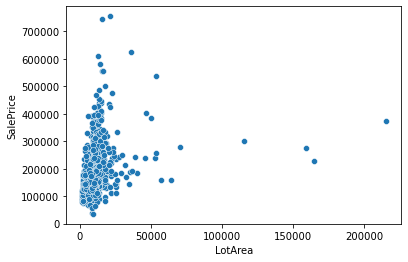

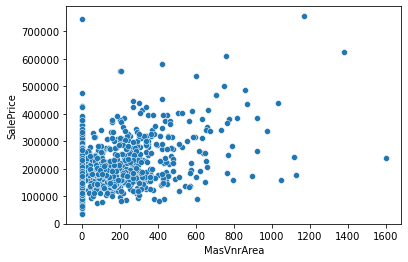

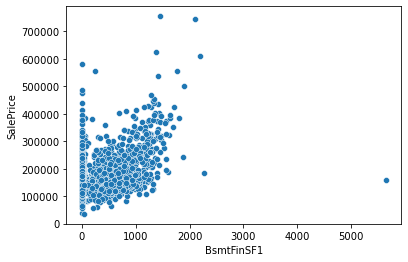

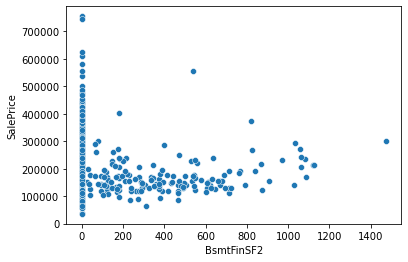

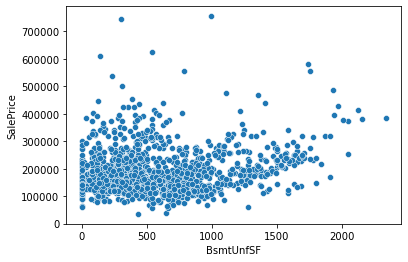

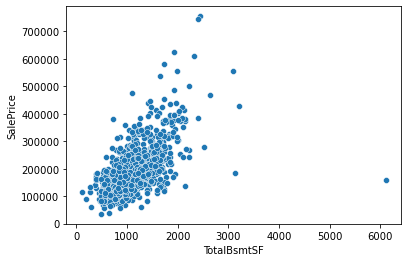

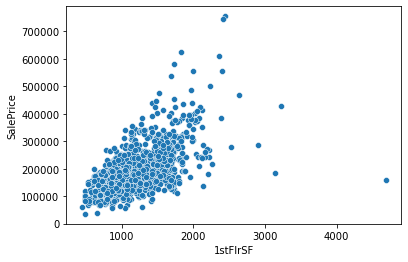

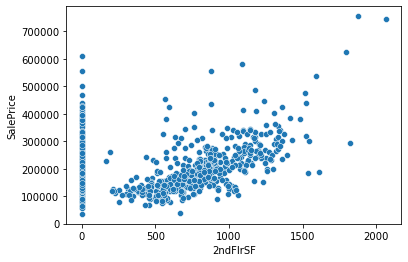

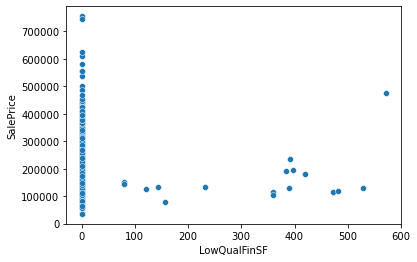

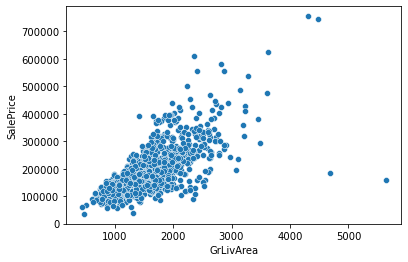

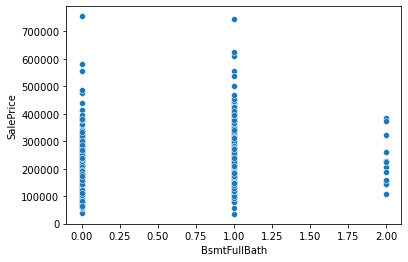

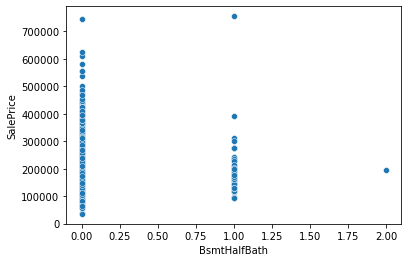

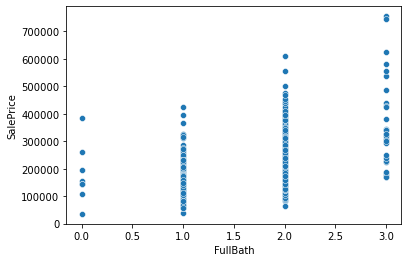

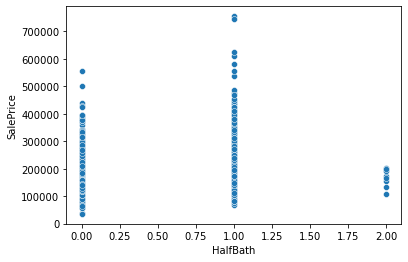

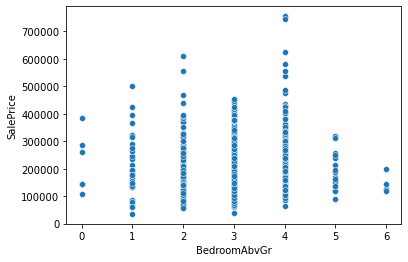

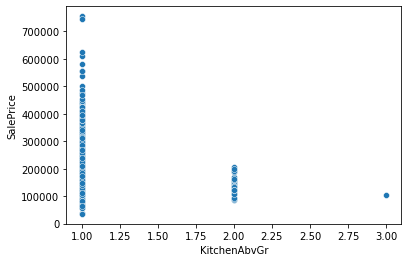

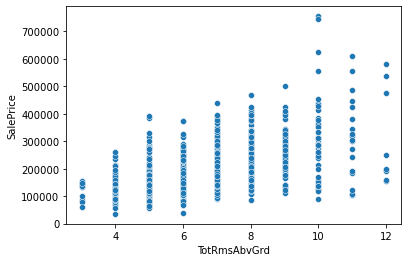

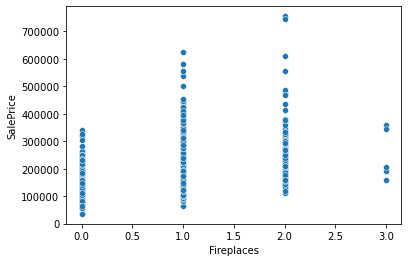

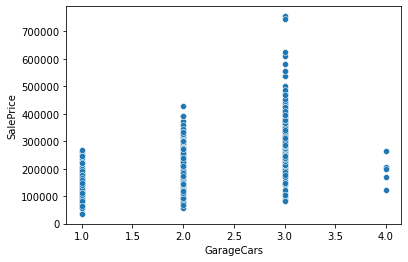

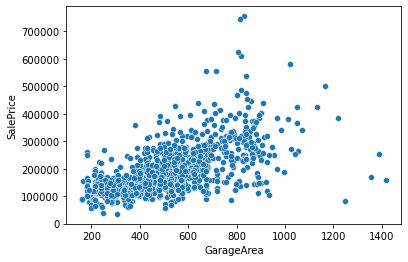

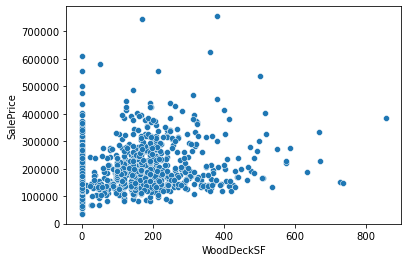

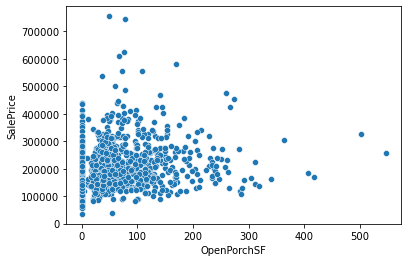

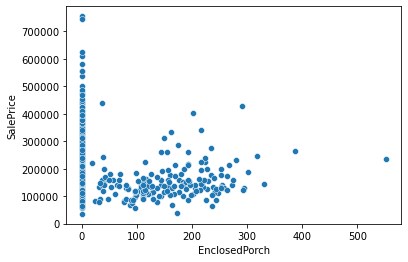

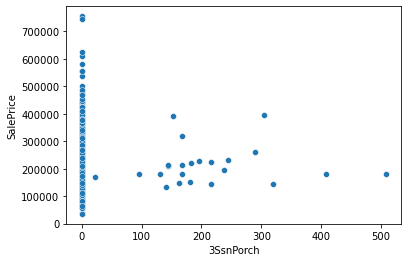

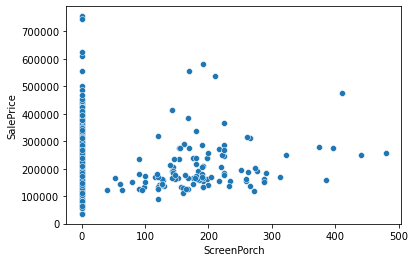

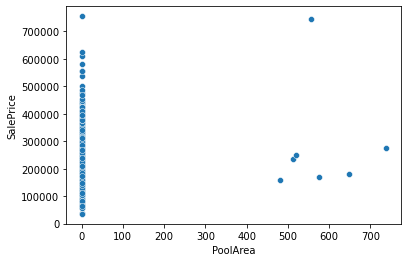

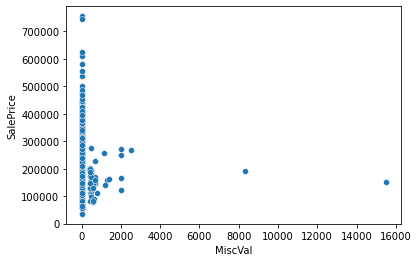

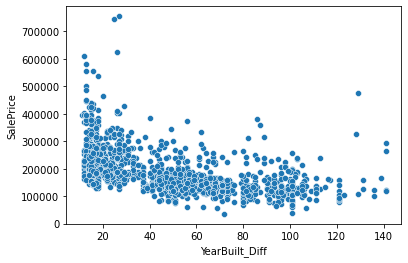

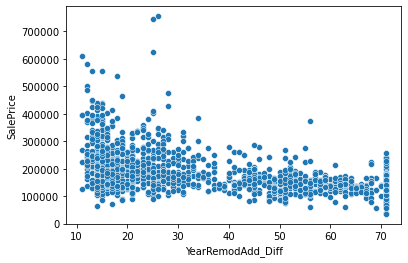

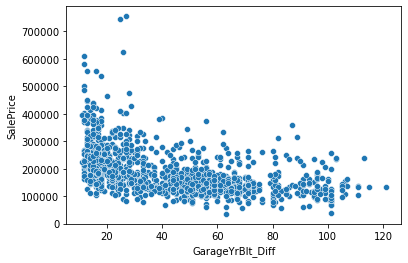

In [22]:
# Creating scatterplots for the numeric columns

for col in numerical_cols[:-1]:  # Excluding the 'SalePrice' column
    sns.scatterplot(x=col, y='SalePrice', data=houses)
    plt.show()

From the above plots, we can see that multiple variables show a linear trend with the 'SalePrice' variable.<br />
Thus creating a model using regression is possible.

- Creating boxplots for the categorical variables

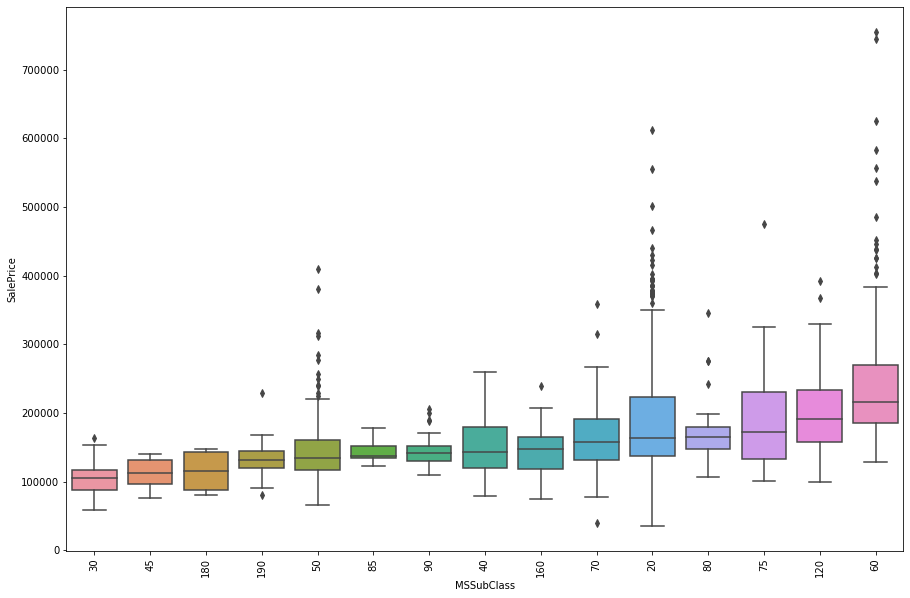

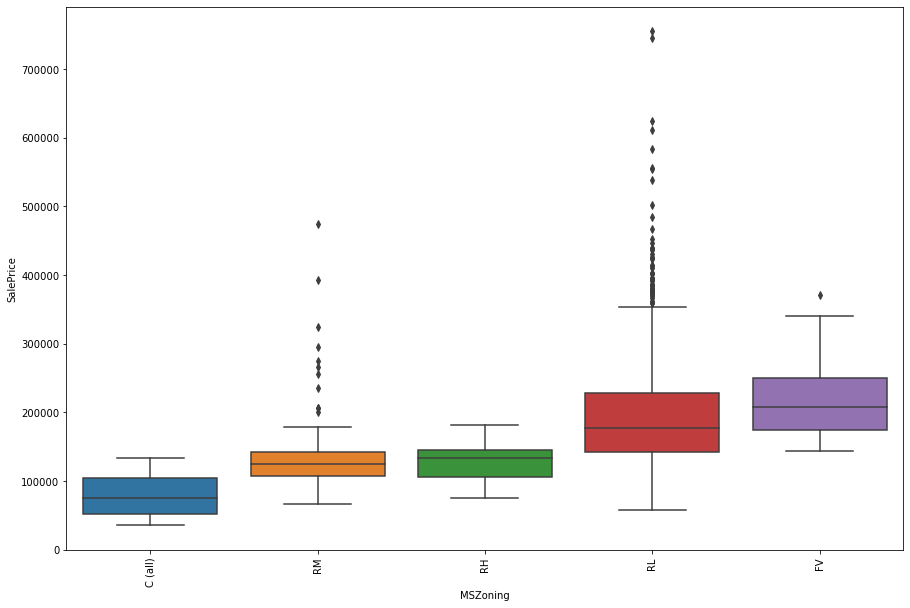

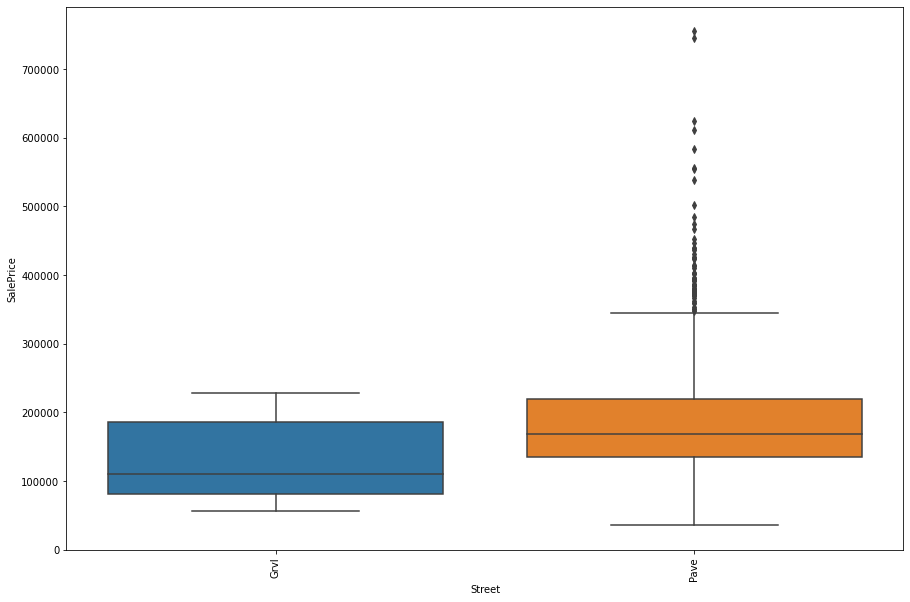

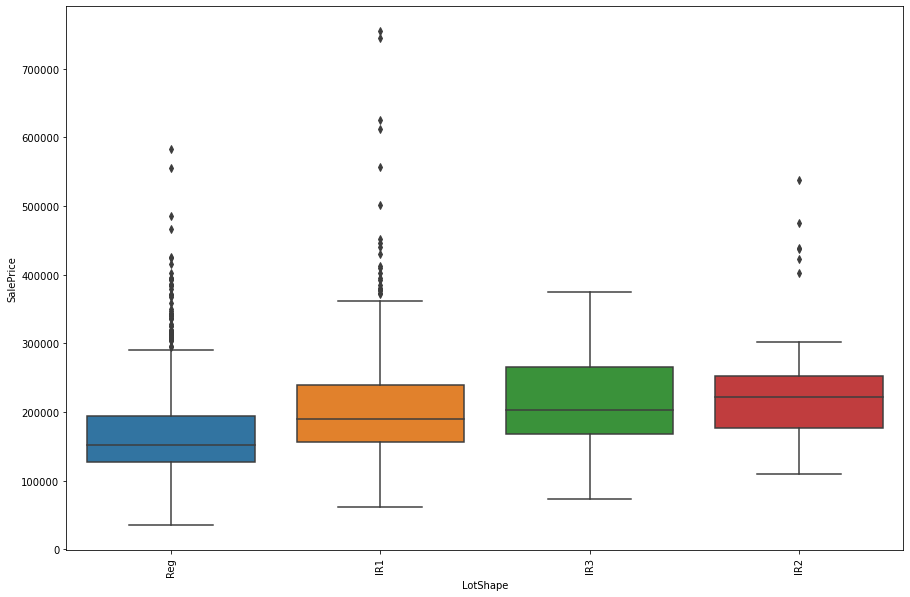

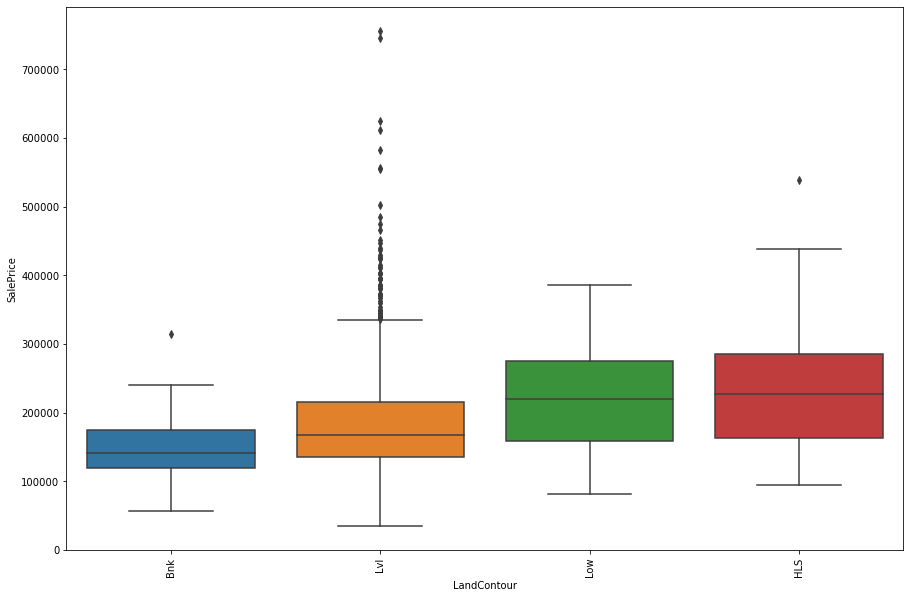

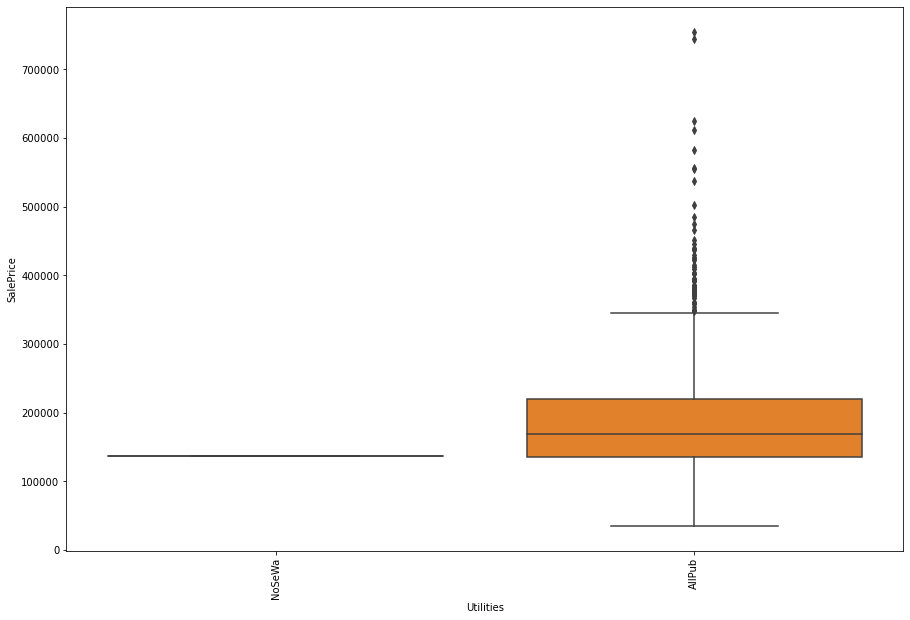

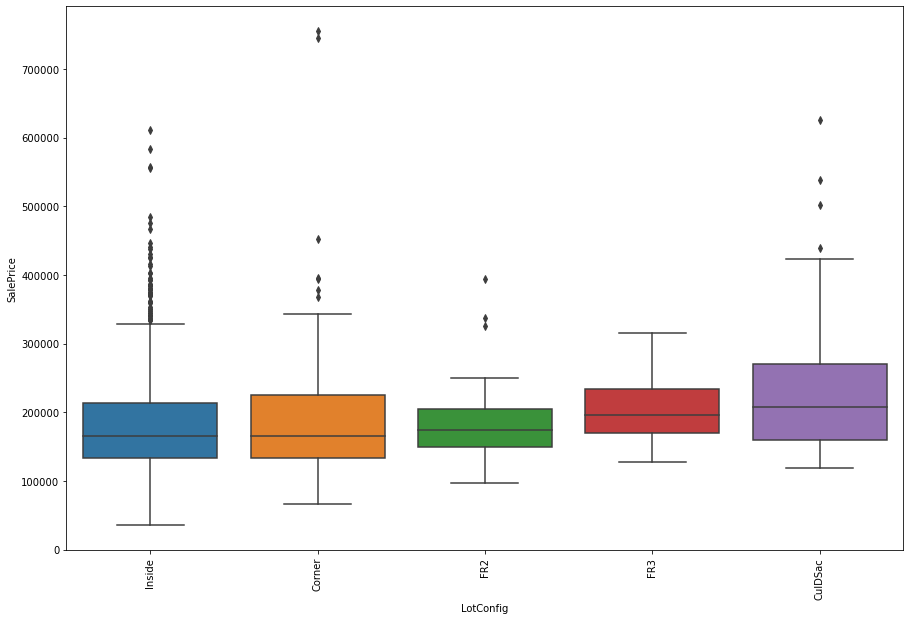

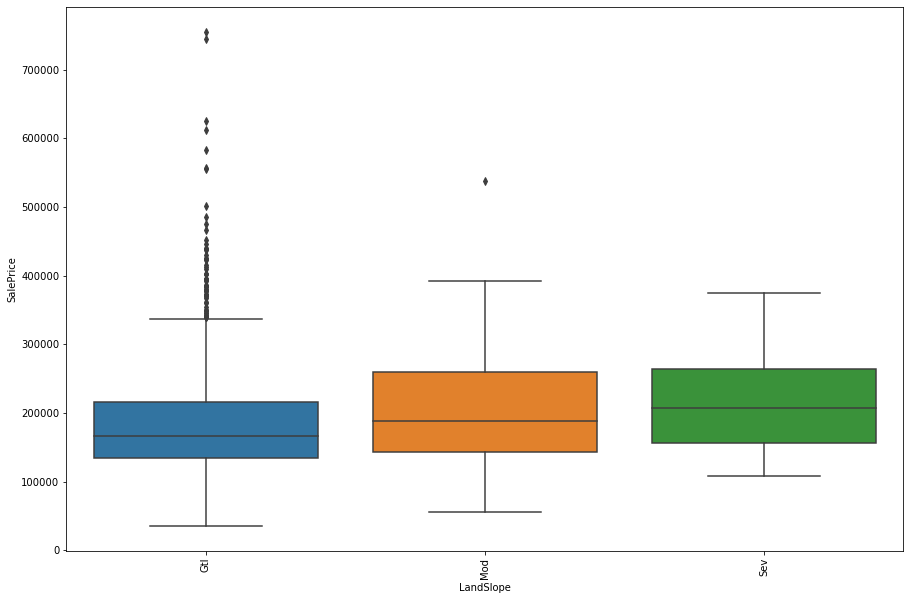

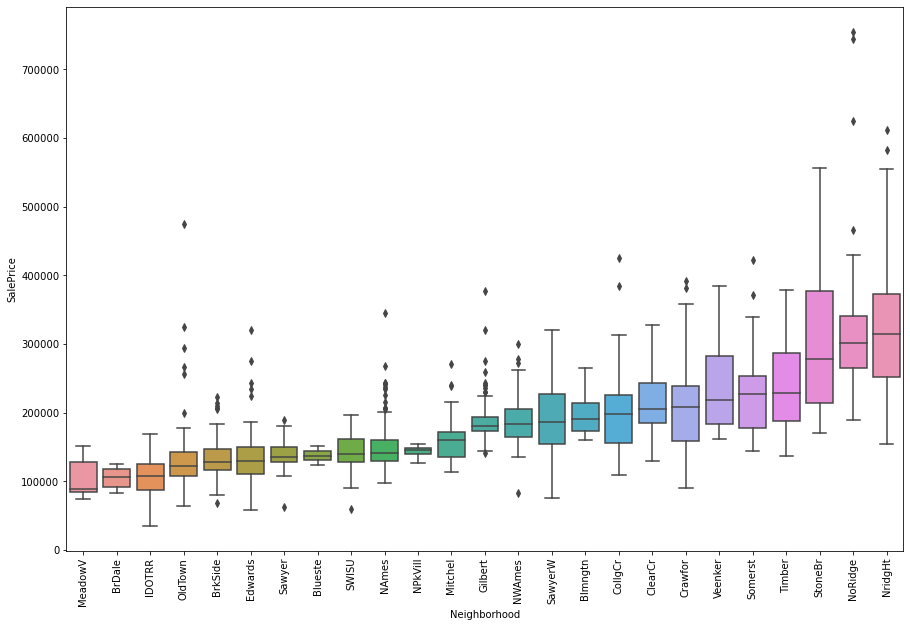

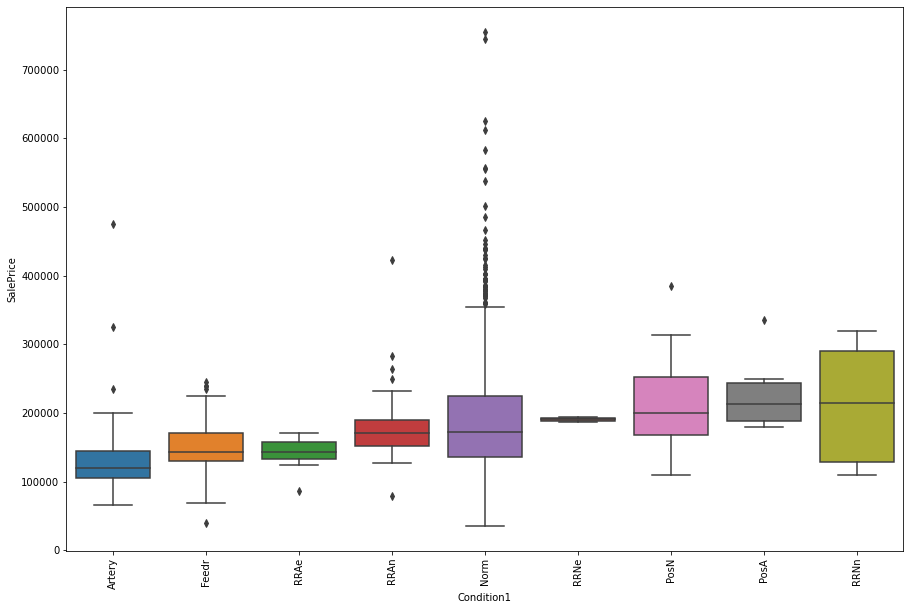

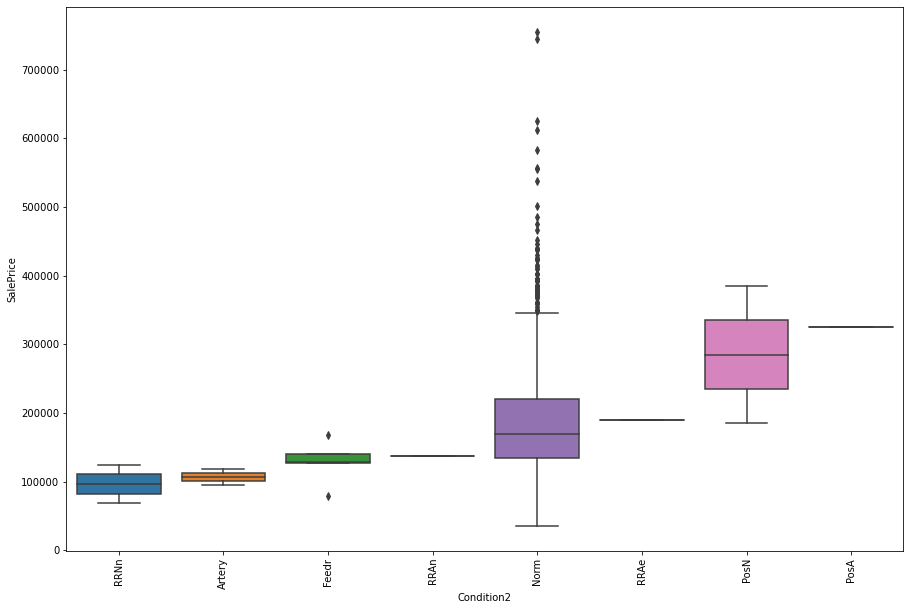

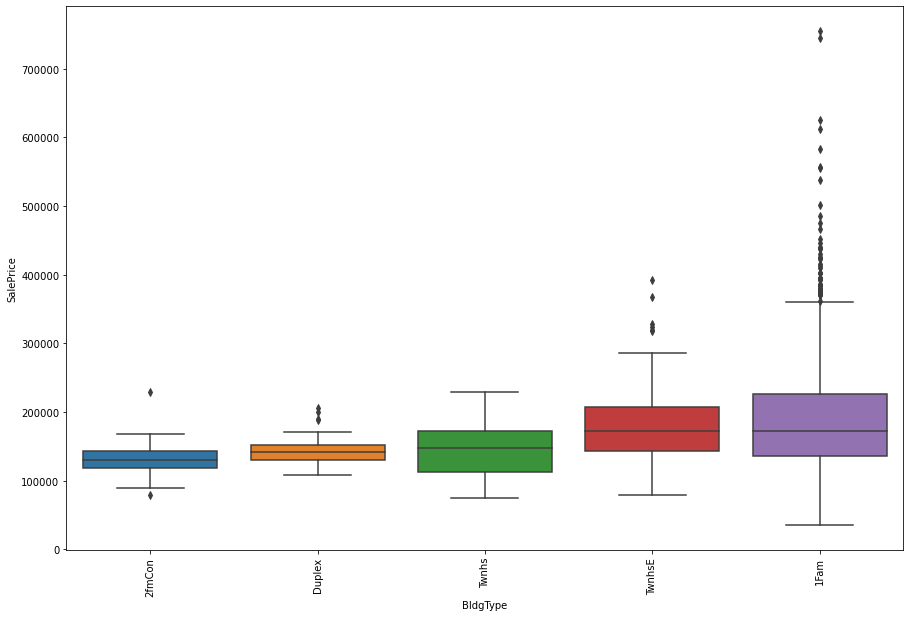

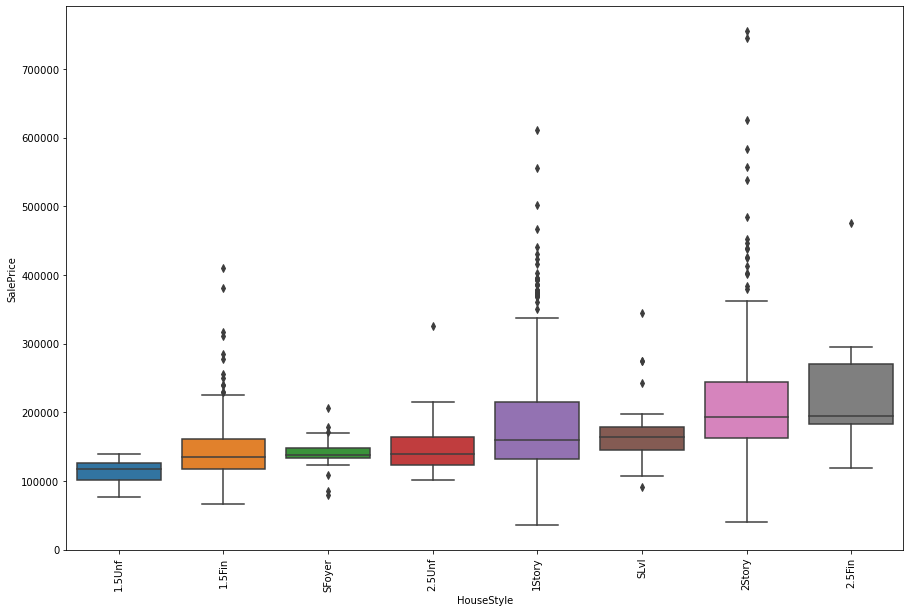

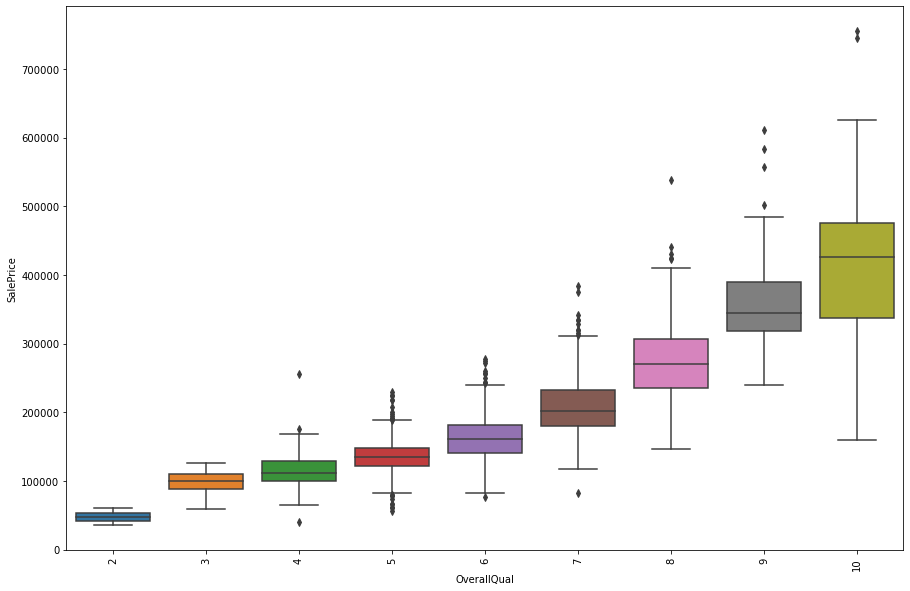

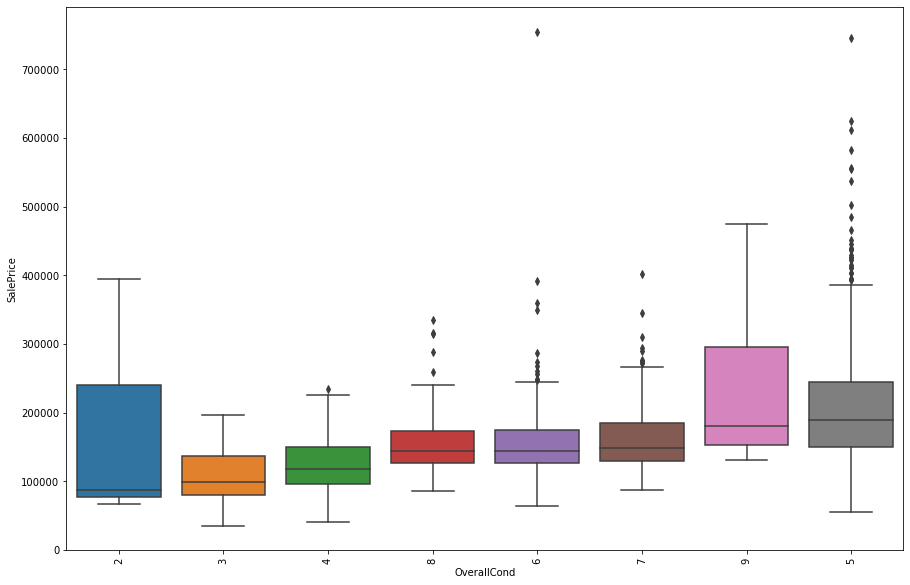

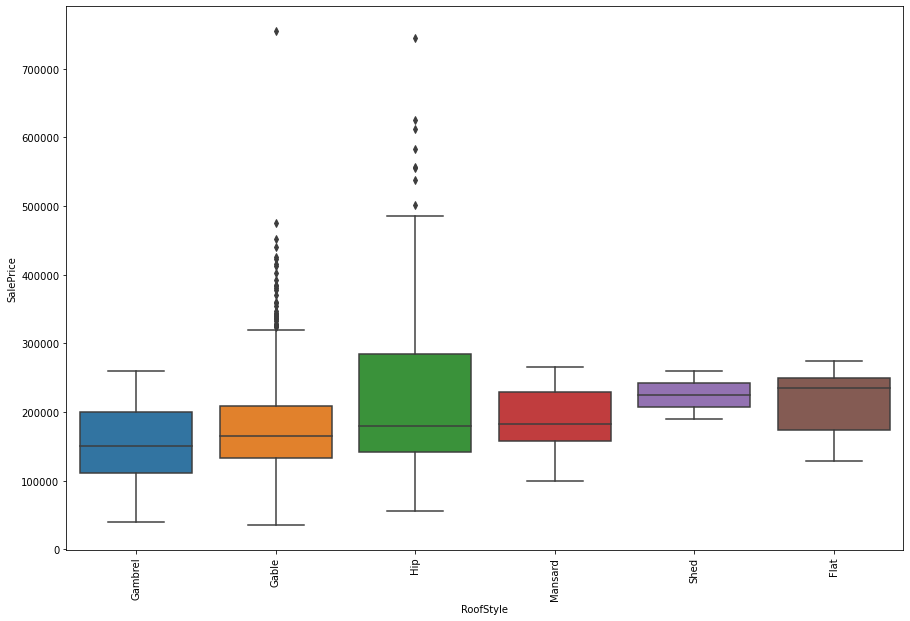

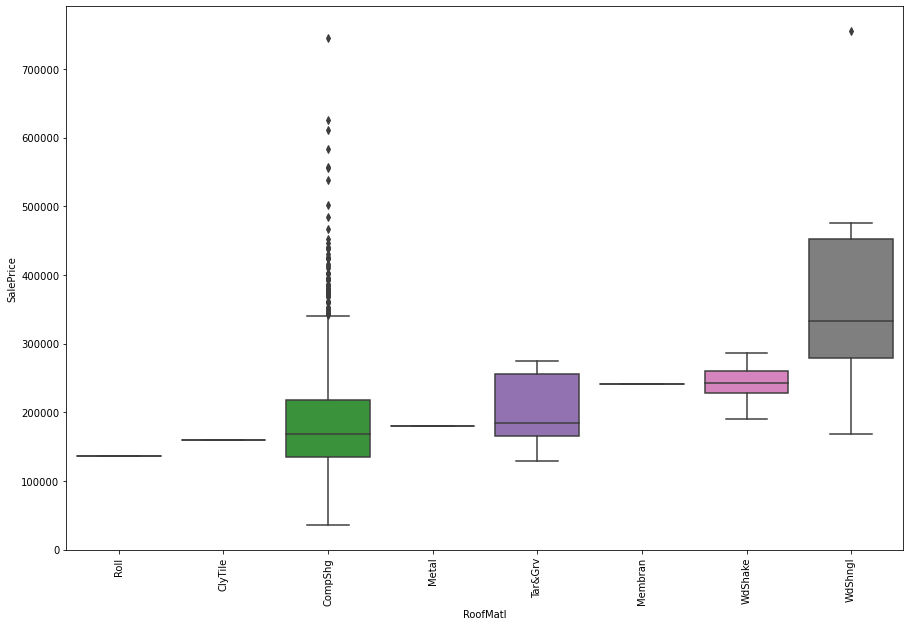

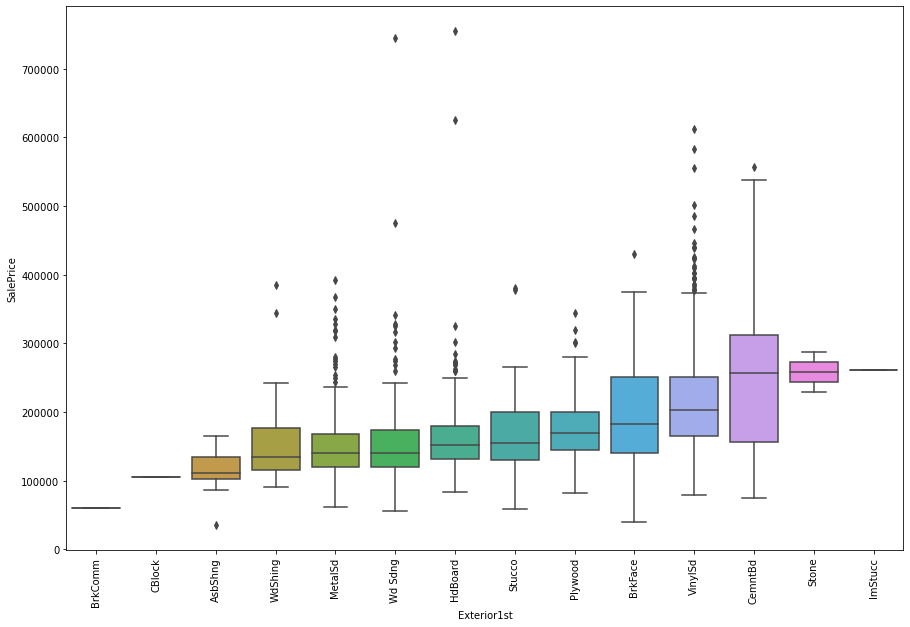

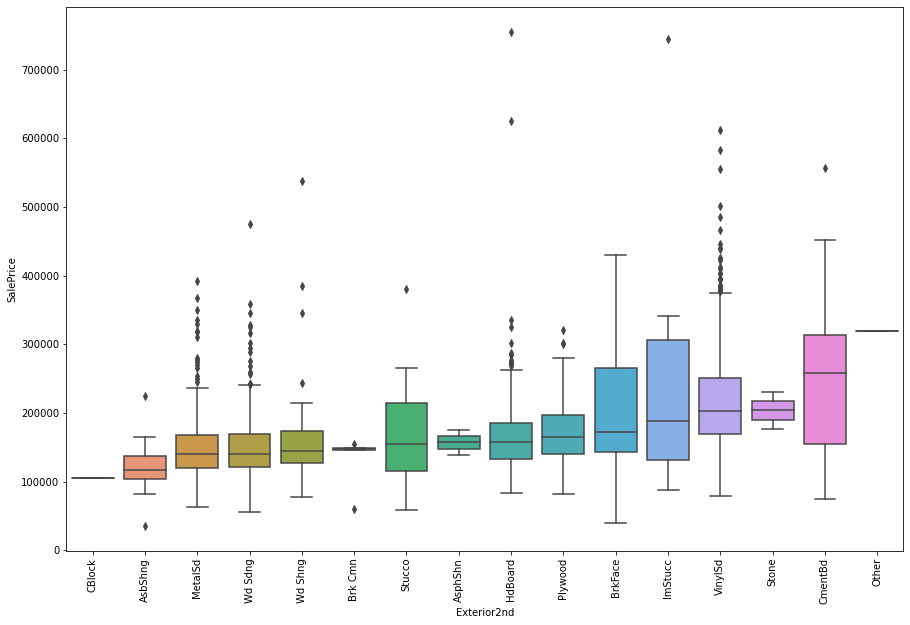

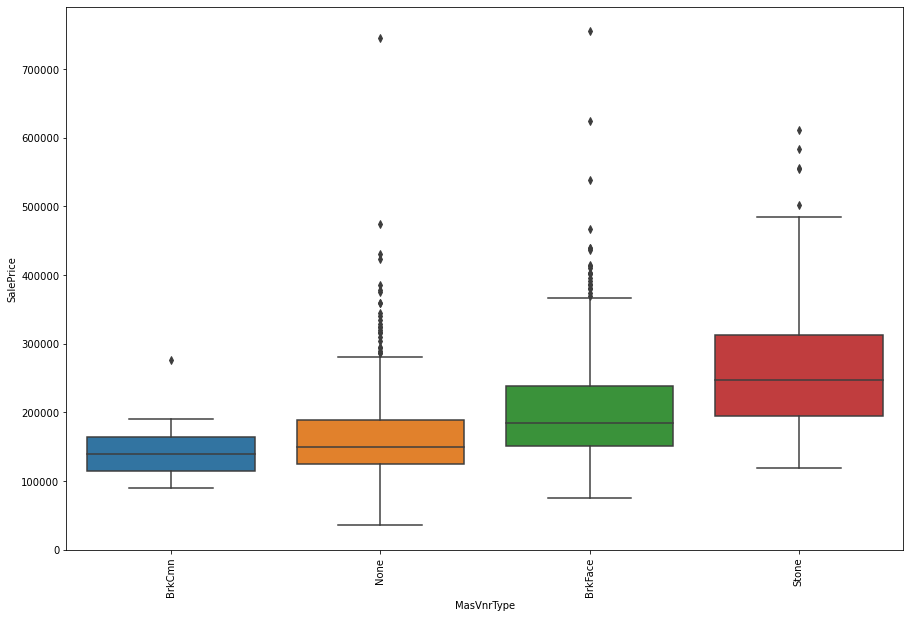

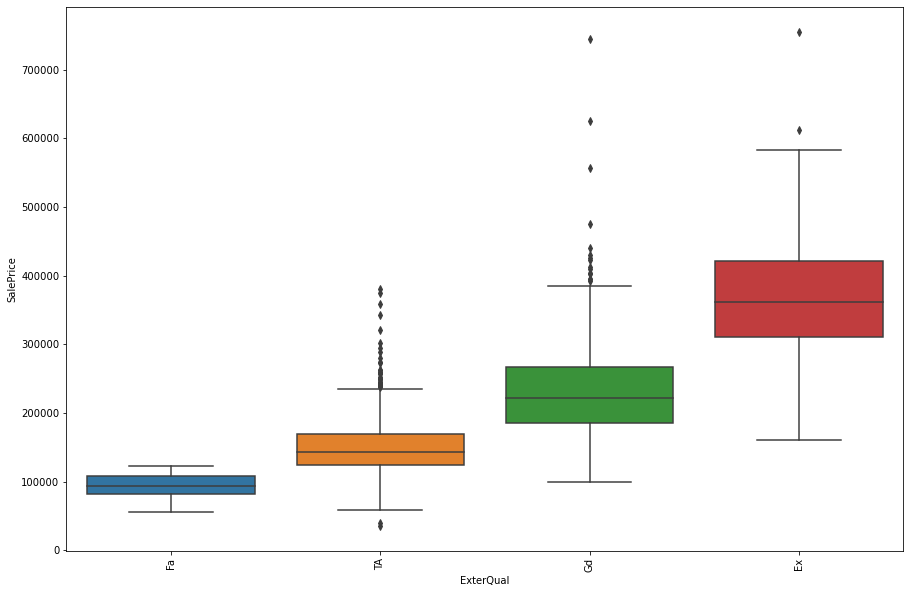

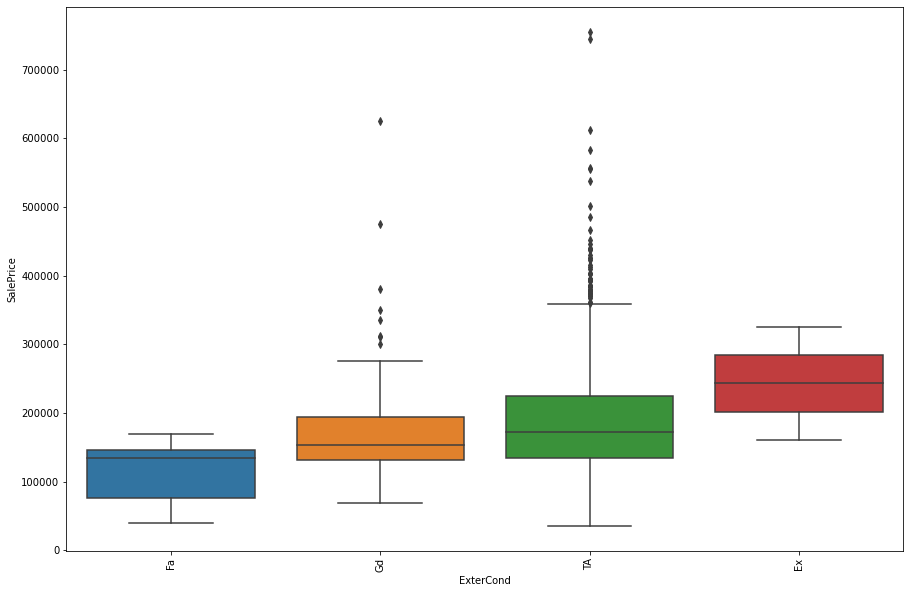

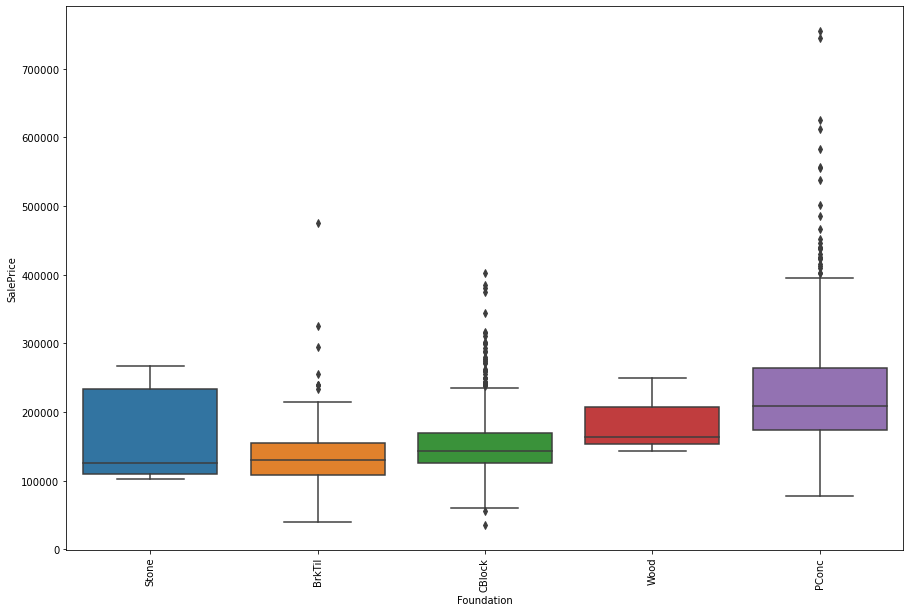

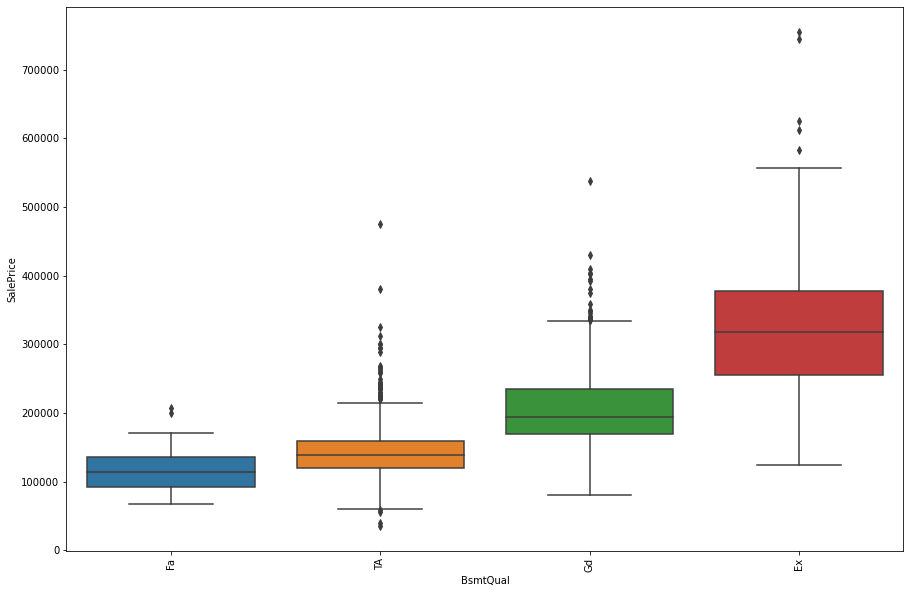

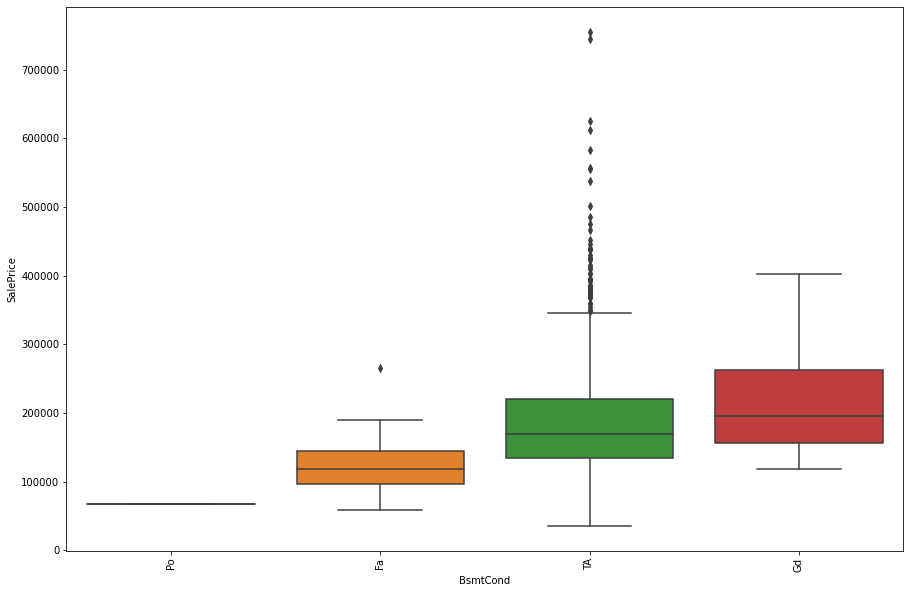

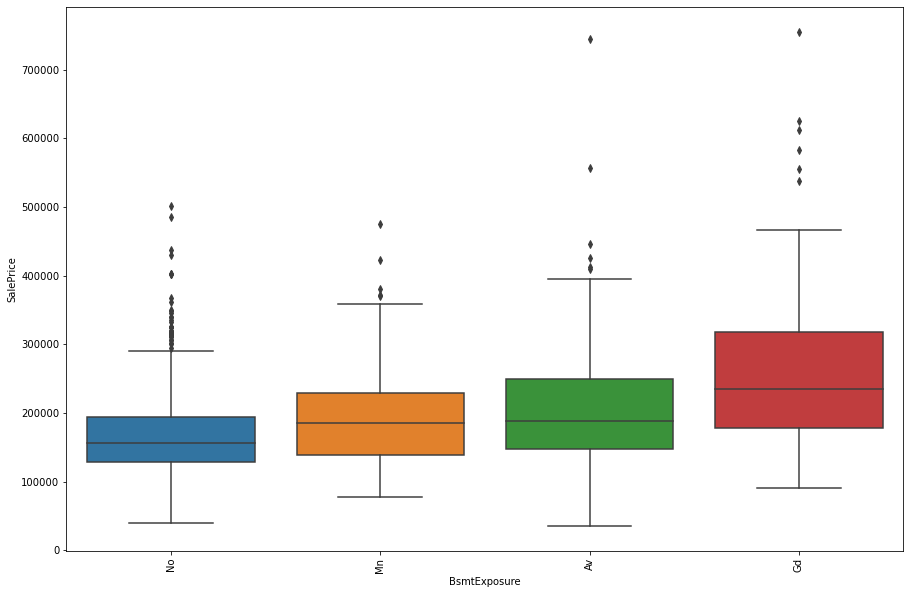

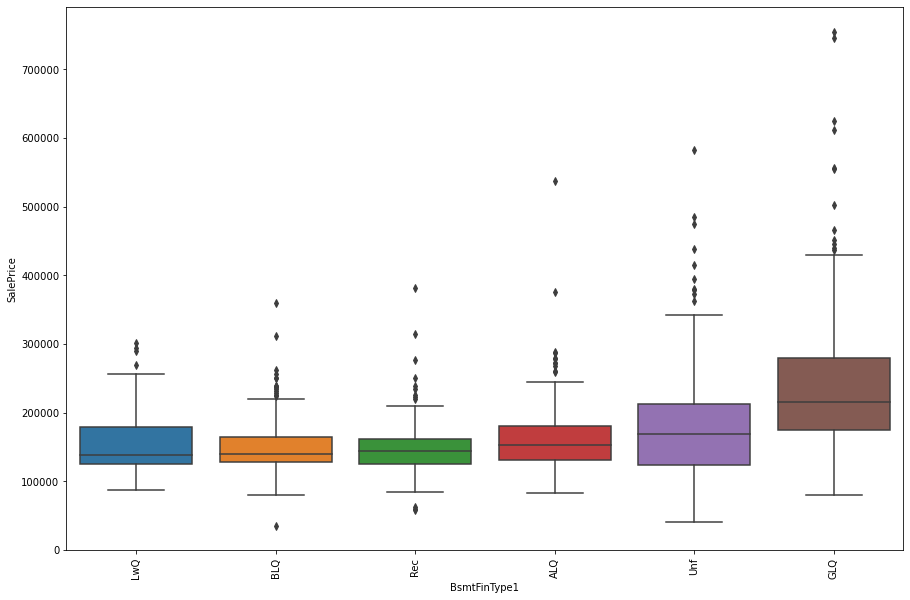

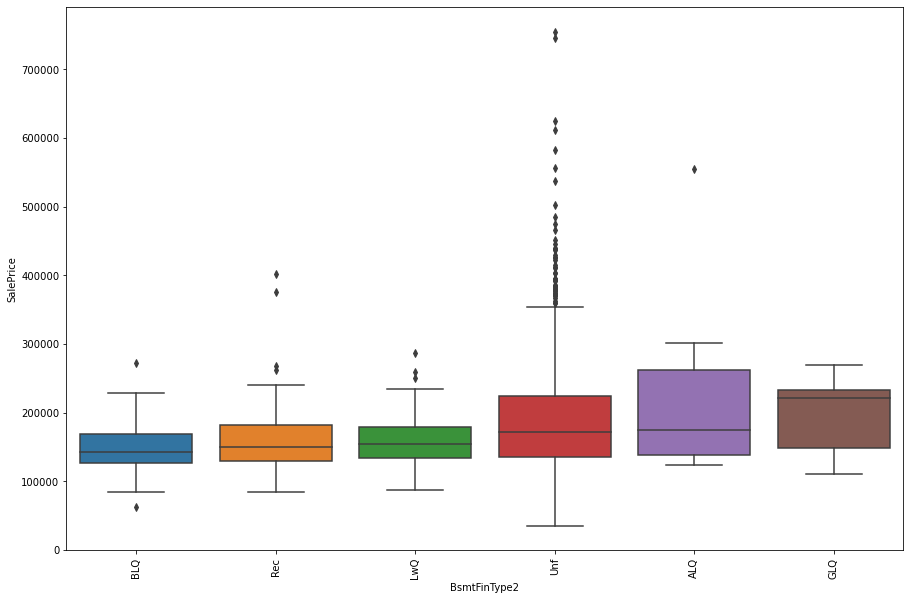

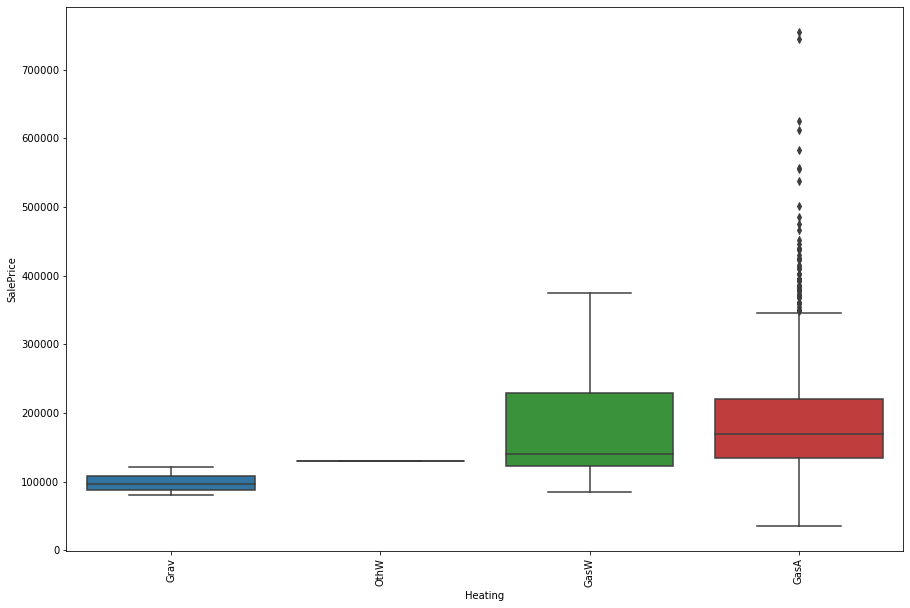

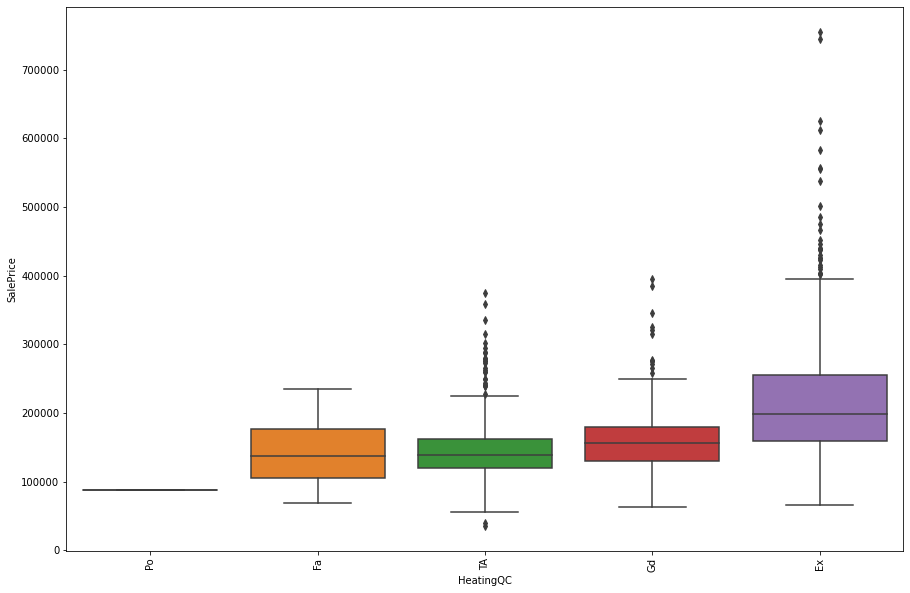

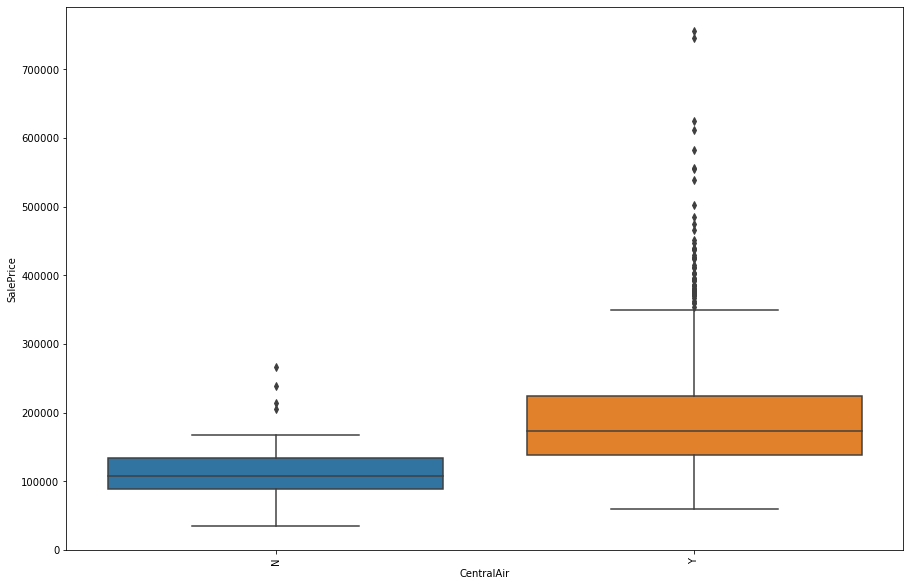

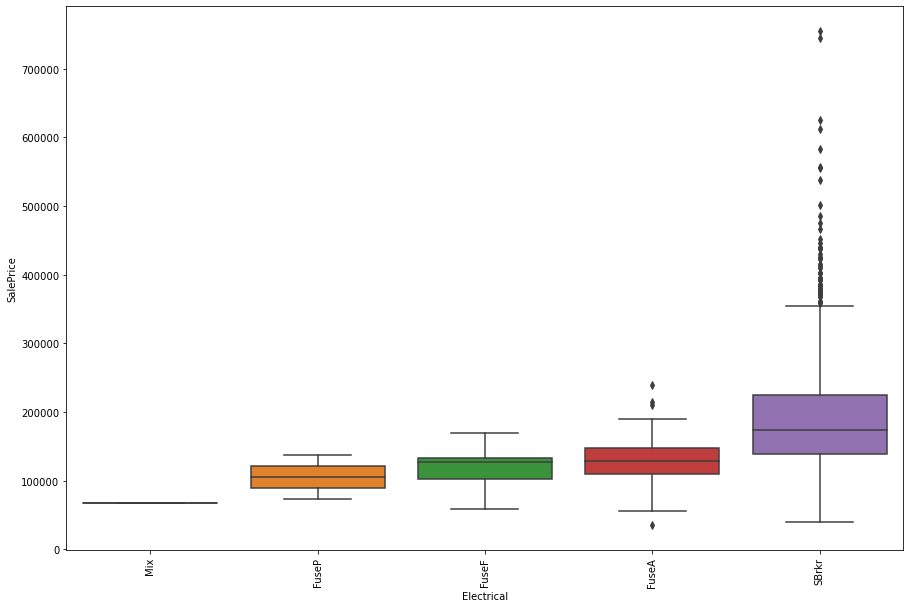

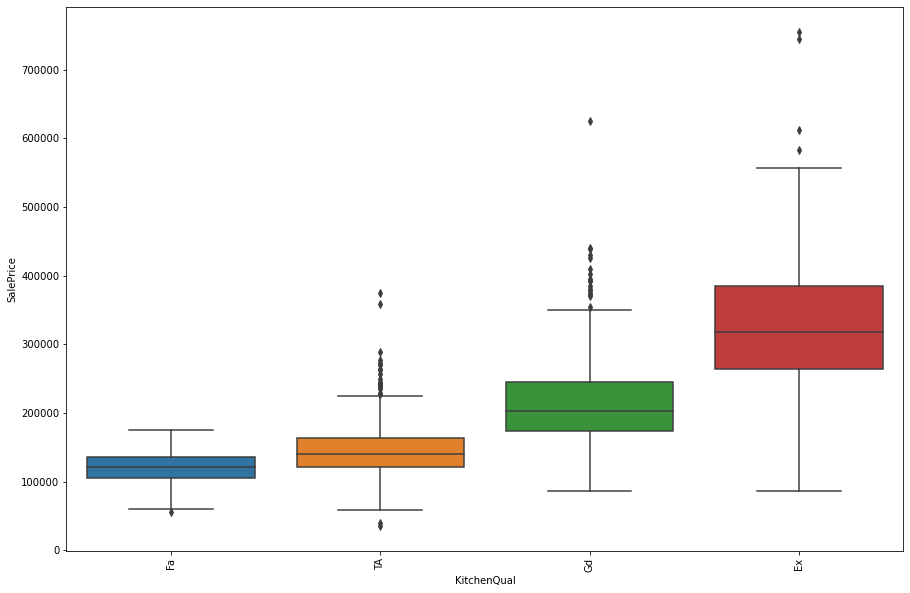

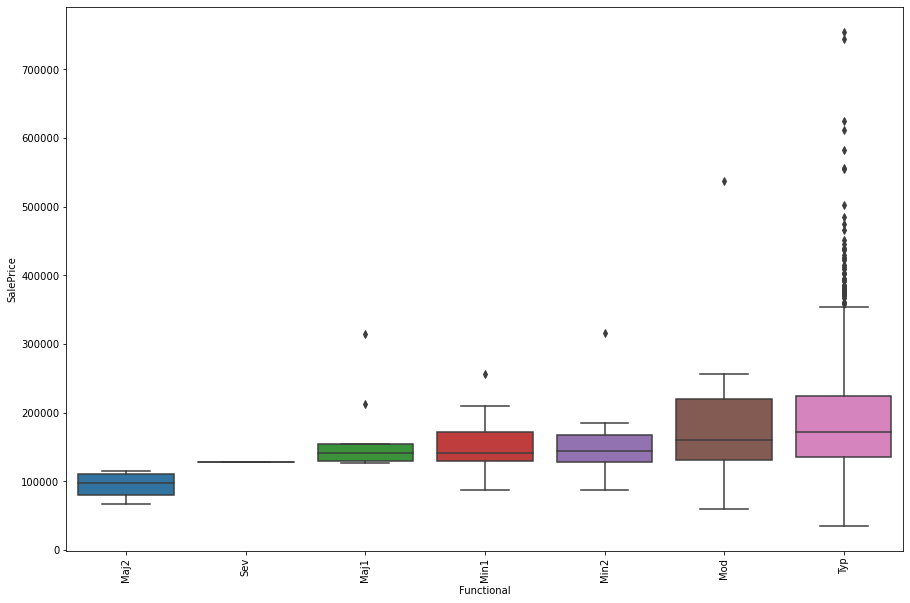

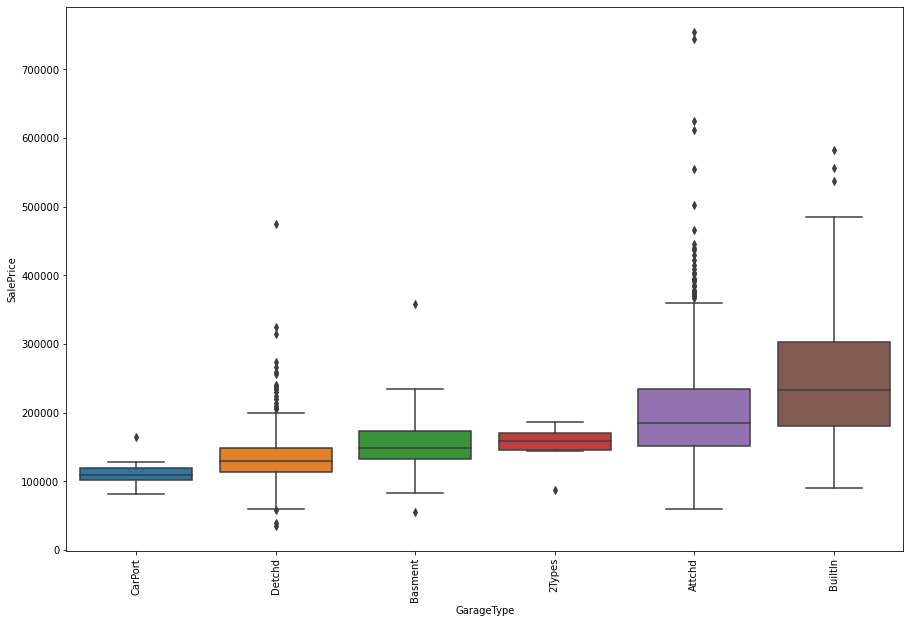

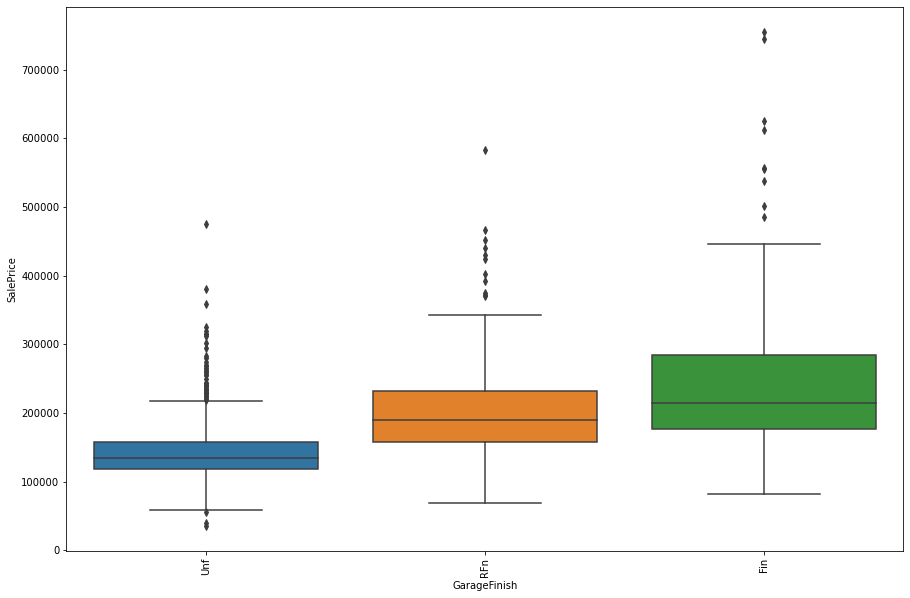

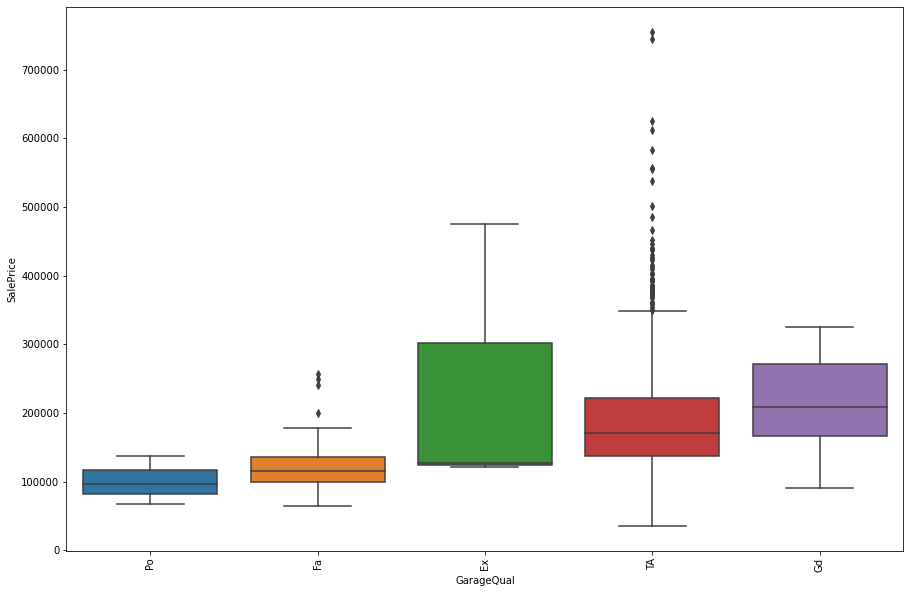

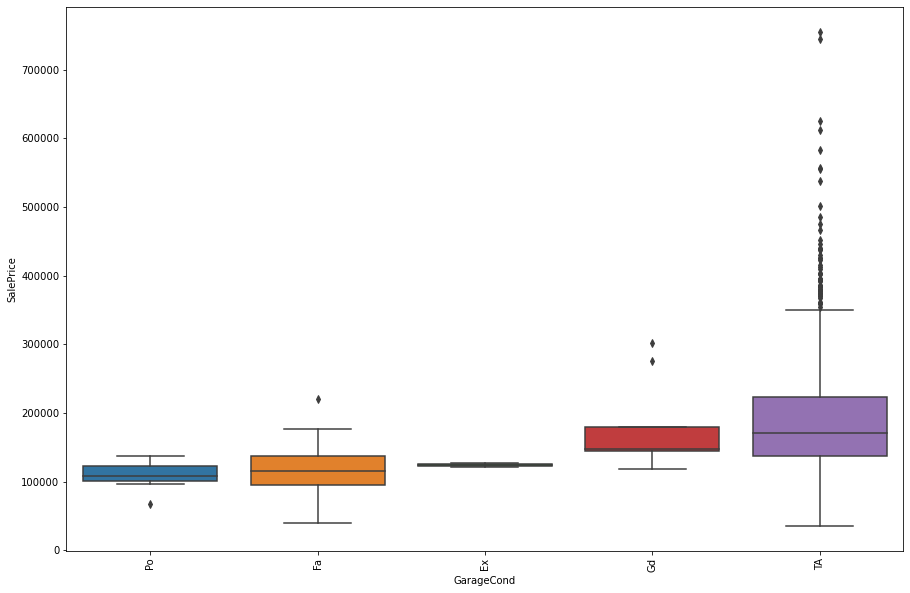

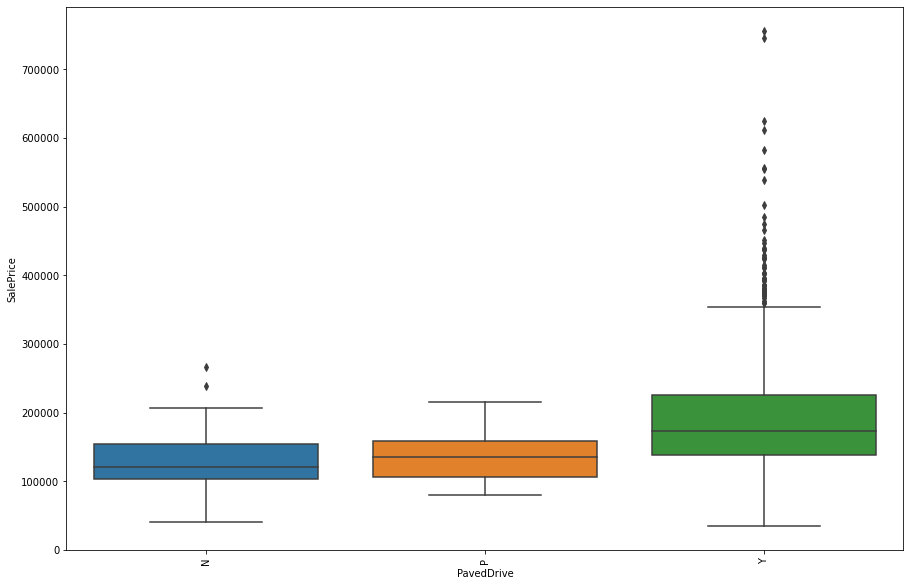

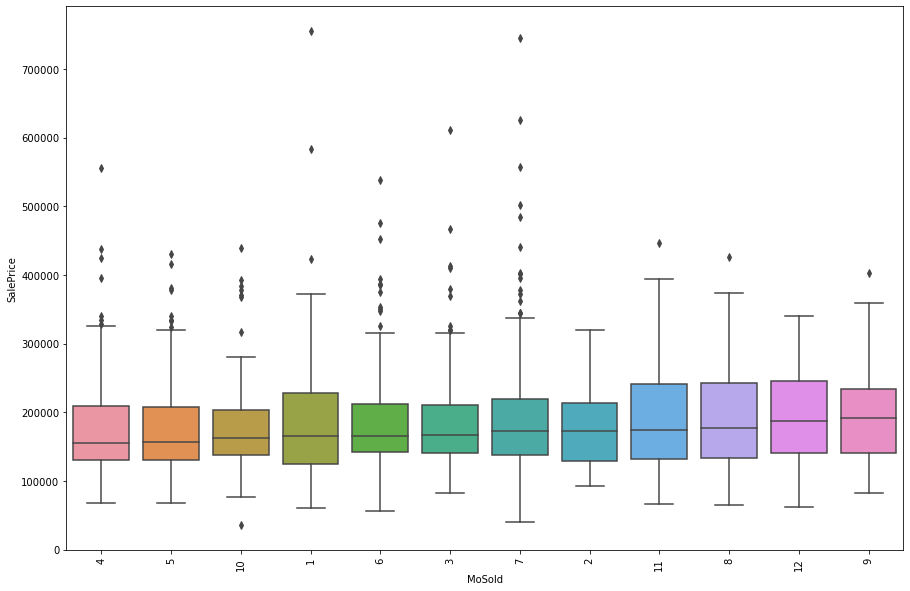

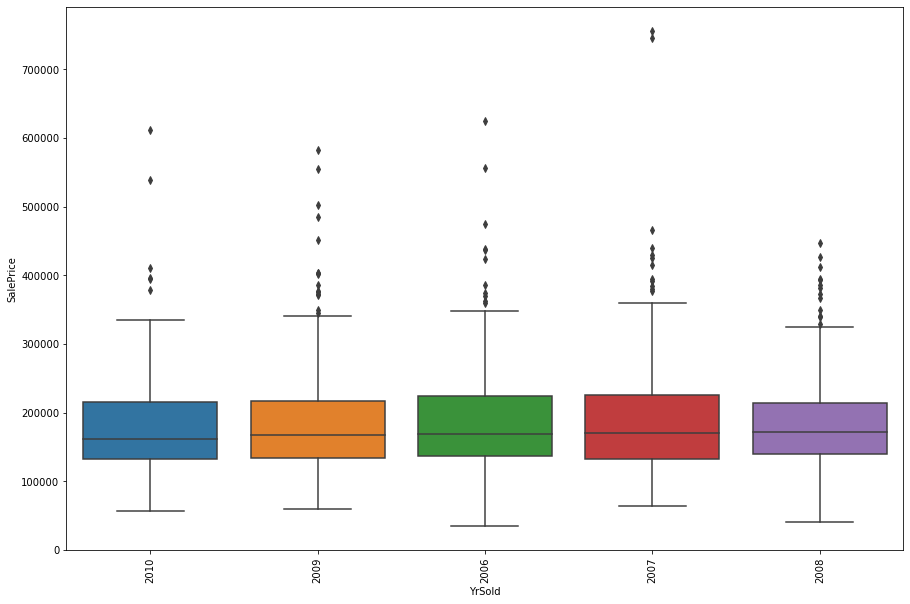

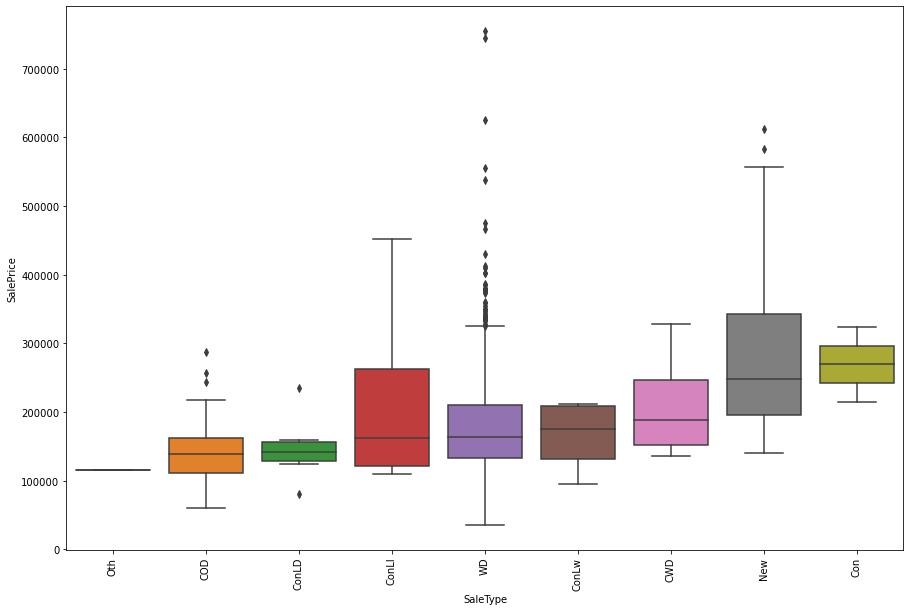

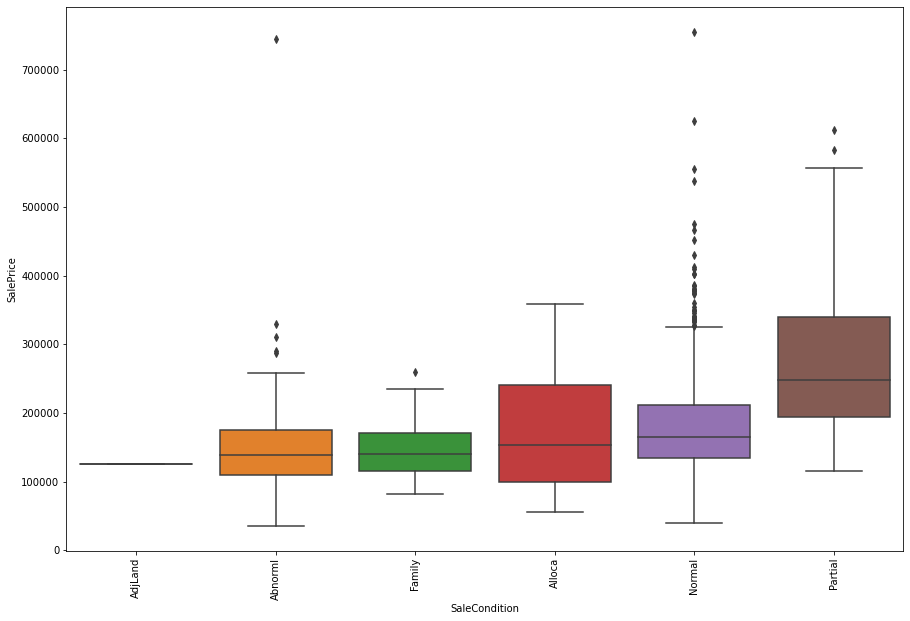

In [23]:
for col in categorical_cols:
    plt.figure(figsize=(15, 10))
    sns.boxplot(x=col, y='SalePrice', data=houses, order=houses.groupby([col])['SalePrice']
                .median().sort_values().index)
    plt.xticks(rotation=90)
    plt.show()

In [24]:
# Checking the correlation between the variables
corr_ = houses.corr()
corr_

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YearBuilt_Diff,YearRemodAdd_Diff,GarageYrBlt_Diff
MSSubClass,1.000000,-0.134158,0.051690,-0.098153,0.056456,0.038513,0.031333,-0.069053,-0.079329,-0.141025,-0.263613,-0.258787,0.306709,0.019990,0.068782,-0.011317,-0.000151,0.117720,0.197520,-0.065699,0.239177,0.014514,-0.024752,0.082040,0.006872,-0.070278,-0.010175,-0.000359,-0.022598,-0.041391,-0.022748,0.010199,-0.021512,-0.016283,-0.021591,-0.079599,-0.056456,-0.038513,-0.082040
LotArea,-0.134158,1.000000,0.090451,0.001415,-0.005022,0.001681,0.096727,0.210148,0.110493,-0.014589,0.267188,0.288502,0.047773,0.009729,0.255445,0.160687,0.046420,0.115727,0.006052,0.120369,-0.012611,0.185654,0.263061,-0.025700,0.138228,0.168630,0.167822,0.084942,-0.017968,0.019326,0.038489,0.077050,0.040824,0.000118,-0.012066,0.254757,0.005022,-0.001681,0.025700
OverallQual,0.051690,0.090451,1.000000,-0.163080,0.570668,0.549460,0.401175,0.197441,-0.086014,0.292940,0.505897,0.481978,0.281145,-0.016704,0.594470,0.083254,-0.064952,0.580425,0.249283,0.081994,-0.135084,0.442941,0.377359,0.545835,0.591878,0.530092,0.218570,0.307615,-0.116931,0.026470,0.045257,0.064570,-0.029351,0.062641,-0.013949,0.783546,-0.570668,-0.549460,-0.545835
OverallCond,-0.098153,0.001415,-0.163080,1.000000,-0.417330,0.035076,-0.141080,-0.060068,0.035698,-0.161038,-0.228020,-0.144066,0.011685,0.041865,-0.093843,-0.070089,0.119671,-0.211882,-0.073568,0.023180,-0.070910,-0.063883,-0.031910,-0.336541,-0.249832,-0.204905,-0.012947,-0.060429,0.071473,0.023789,0.053759,-0.003544,0.077314,-0.011772,0.056340,-0.108627,0.417330,-0.035076,0.336541
YearBuilt,0.056456,-0.005022,0.570668,-0.417330,1.000000,0.617156,0.299410,0.224264,-0.070403,0.147762,0.385146,0.263585,0.006989,-0.160289,0.189146,0.175108,-0.055204,0.486777,0.227626,-0.080644,-0.176124,0.099415,0.110807,0.825172,0.524076,0.443854,0.212296,0.216793,-0.385415,0.028982,-0.070809,0.001006,-0.033493,0.004396,-0.007898,0.504297,-1.000000,-0.617156,-0.825172
YearRemodAdd,0.038513,0.001681,0.549460,0.035076,0.617156,1.000000,0.168311,0.099681,-0.085268,0.171881,0.264281,0.241889,0.120545,-0.064395,0.276580,0.099294,-0.023966,0.460120,0.169456,-0.074393,-0.154147,0.174660,0.089952,0.641585,0.459449,0.386213,0.201057,0.231129,-0.218452,0.039422,-0.052513,0.003354,-0.001379,0.014552,0.034503,0.501435,-0.617156,-1.000000,-0.641585
MasVnrArea,0.031333,0.096727,0.401175,-0.141080,0.299410,0.168311,1.000000,0.253015,-0.083303,0.104662,0.365629,0.341001,0.169730,-0.061707,0.392006,0.078875,0.015804,0.272271,0.193268,0.108829,-0.007299,0.289758,0.229365,0.249750,0.363916,0.367237,0.149182,0.129015,-0.112225,0.015221,0.052474,0.009334,-0.028975,-0.013461,-0.001521,0.465811,-0.299410,-0.168311,-0.249750
BsmtFinSF1,-0.069053,0.210148,0.197441,-0.060068,0.224264,0.099681,0.253015,1.000000,-0.064855,-0.552809,0.505000,0.450366,-0.151876,-0.051909,0.201974,0.638094,0.057227,0.045094,-0.025251,-0.119100,-0.035623,0.046284,0.245323,0.144611,0.197559,0.284095,0.187178,0.107561,-0.105669,0.026811,0.051906,0.142708,0.007869,-0.021242,0.023958,0.359677,-0.224264,-0.099681,-0.144611
BsmtFinSF2,-0.079329,0.110493,-0.086014,0.035698,-0.070403,-0.085268,-0.083303,-0.064855,1.000000,-0.233449,0.083184,0.094065,-0.109254,0.007072,-0.021993,0.154980,0.072813,-0.090448,-0.038494,-0.008179,-0.028278,-0.042207,0.035643,-0.092595,-0.080264,-0.053411,0.061206,0.004211,0.045668,-0.031475,0.085865,0.041148,0.006246,-0.022039,0.032855,-0.031226,0.070403,0.085268,0.092595
BsmtUnfSF,-0.141025,-0.014589,0.292940,-0.161038,0.147762,0.171881,0.104662,-0.552809,-0.233449,1.000000,0.363767,0.318097,-0.016117,-0.002384,0.222438,-0.463986,-0

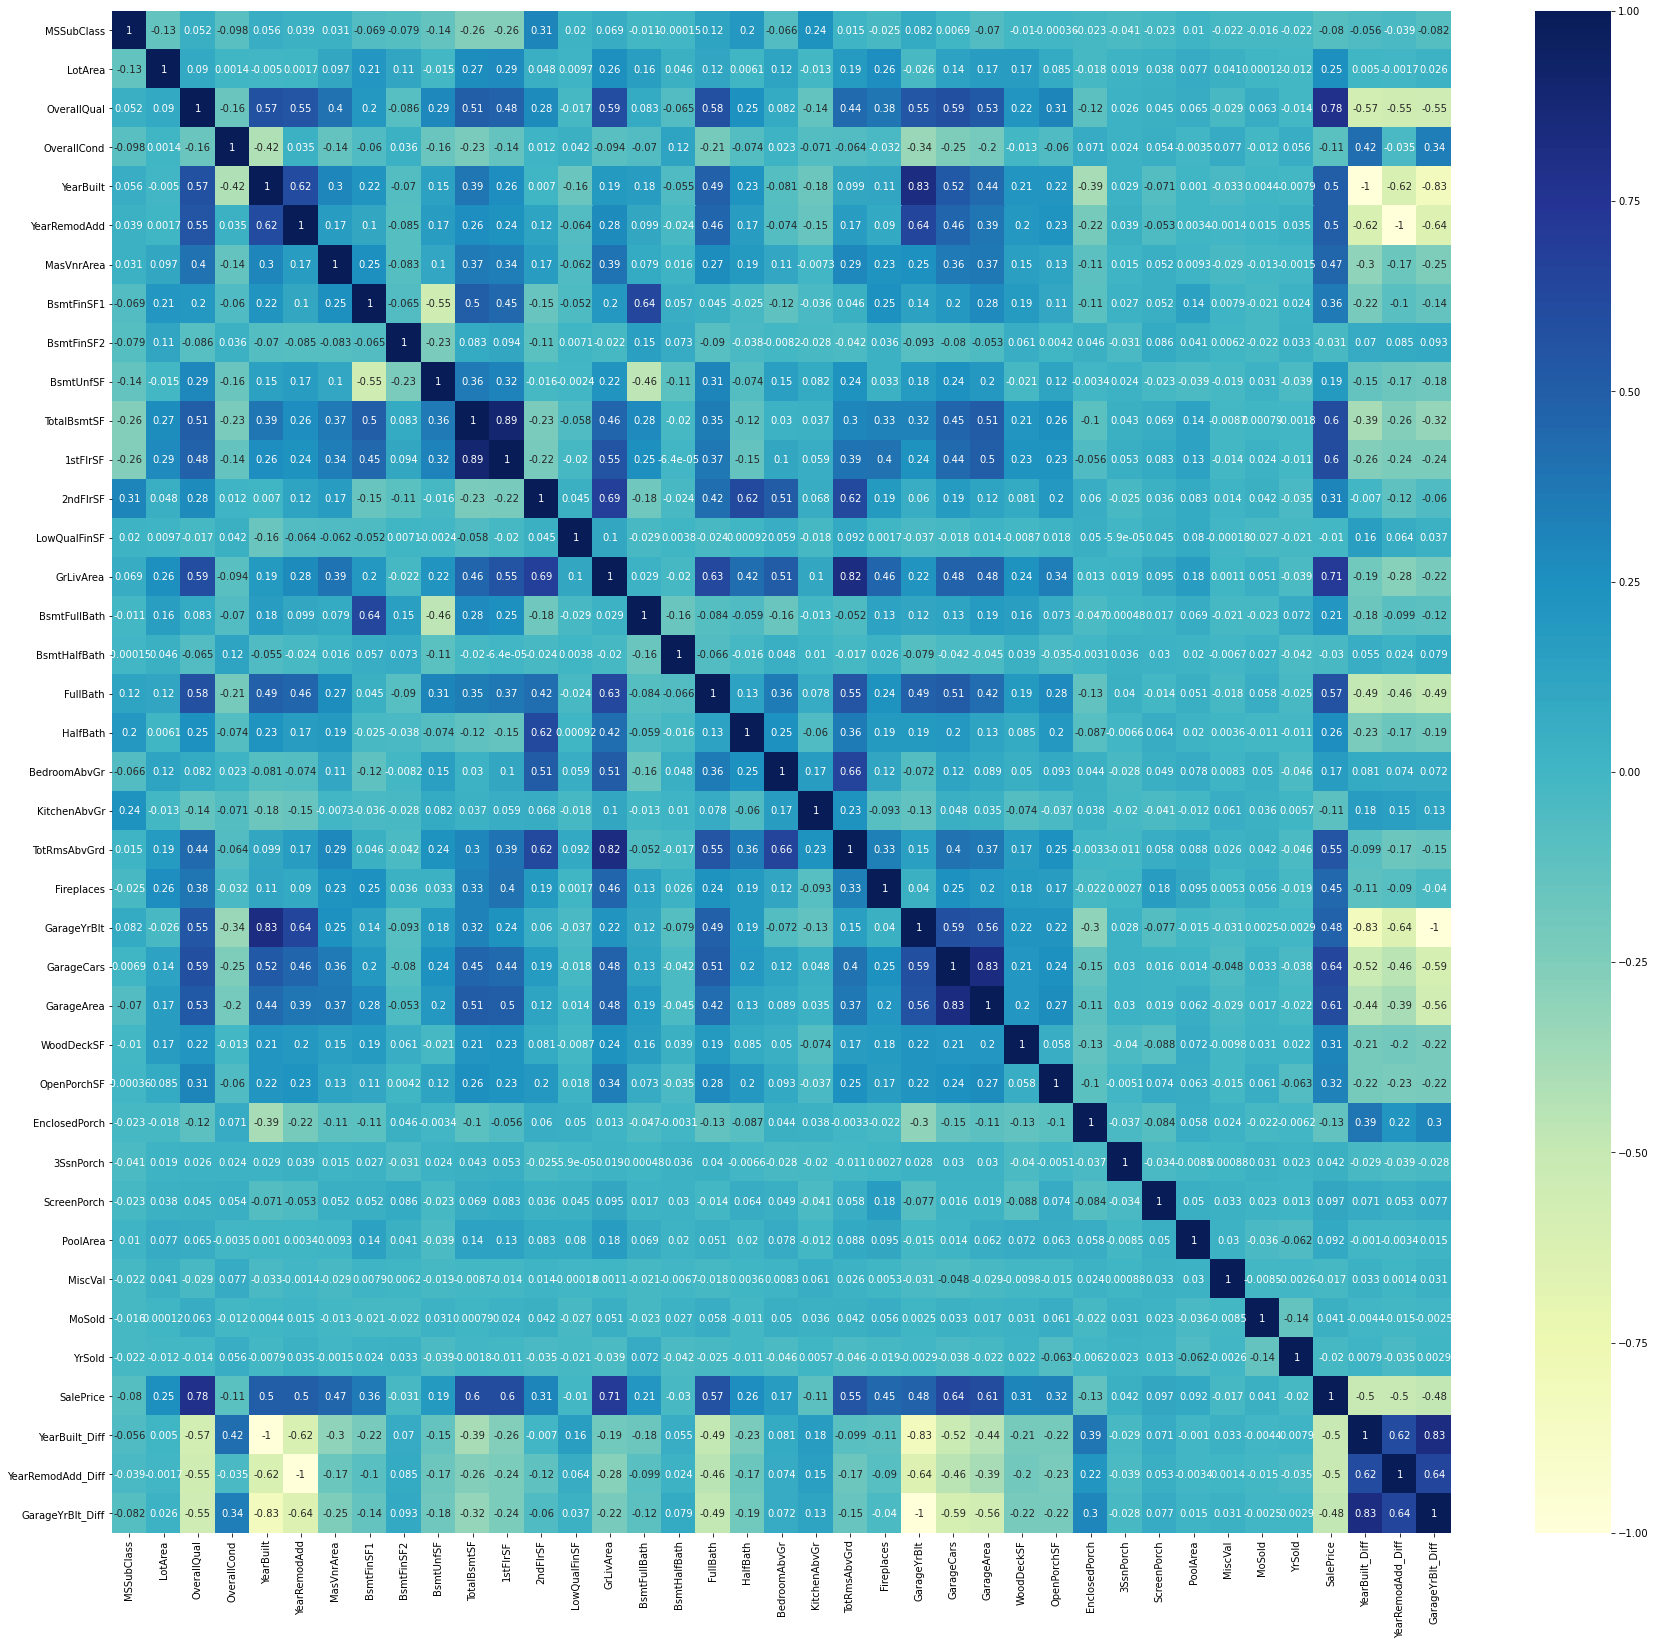

In [25]:
# Plotting a heatmap to visualize the correlation
plt.figure(figsize=(30, 28))
sns.heatmap(corr_, annot=True, cmap='YlGnBu')
plt.show()

From the above heatmap, we can see that there is correlation in the data

### Creating Dummy Variables

In [26]:
houses[categorical_cols] = houses[categorical_cols].astype('object')

In [27]:
dummy = pd.get_dummies(houses[categorical_cols], drop_first=True)

In [28]:
dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [29]:
houses.drop(categorical_cols, axis=1, inplace=True)
houses = pd.concat([houses, dummy], axis=1)
houses.shape

(1338, 269)

## Data preparation and Modelling

In [30]:
# Outlier handling
def drop_outliers(df=houses):
    """
        Drop records with outliers present
        Lower quantile is .25, Upper quantile is .99
    """
    for column in numerical_cols:
        Q1 = df[column].quantile(.25)
        Q3 = df[column].quantile(.99)
        IQR = Q3 - Q1
        df = df[(df[column] >= (Q1 - (1.5 * IQR))) & df[column] <= (Q3 + (1.5 * IQR))]
    return df

In [31]:
houses = drop_outliers(houses)
houses.shape

(1336, 269)

In [32]:
# Splitting into Test and Train set
y = houses.pop('SalePrice')
X = houses

In [33]:
# Running the standard scaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [34]:
# Generating a 70:30 split using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

## Model Building

### Building a Simple Linear Regression model

In [35]:
# linear regression model with all the variables
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predicting on the train set
y_train_pred = lr.predict(X_train)

# Checking the r2_score
r2_score(y_train, y_train_pred)

0.9521114889125379

In [37]:
# Predicting on the test set
y_test_pred = lr.predict(X_test)

# Checking the r2_score
r2_score(y_test, y_test_pred)

0.8311230217826845

In [38]:
# Checking the parameters of the Linear Regression model
print(lr.intercept_)
list(zip(list(lr.coef_), X.columns))

-1160209.5022463317


[(0.7110329891626694, 'LotArea'),
 (207.164166021046, 'YearBuilt'),
 (49.04569774600614, 'YearRemodAdd'),
 (11.161609746464336, 'MasVnrArea'),
 (15.440583660849938, 'BsmtFinSF1'),
 (7.599548569951537, 'BsmtFinSF2'),
 (0.3196694590008633, 'BsmtUnfSF'),
 (23.35974238559845, 'TotalBsmtSF'),
 (11.108493295594485, '1stFlrSF'),
 (23.796601864936434, '2ndFlrSF'),
 (11.253114569523149, 'LowQualFinSF'),
 (46.15828684007431, 'GrLivArea'),
 (-265.05989263971304, 'BsmtFullBath'),
 (3933.1164647060755, 'BsmtHalfBath'),
 (2002.7783526702326, 'FullBath'),
 (1655.5948276781726, 'HalfBath'),
 (-3422.1083593280246, 'BedroomAbvGr'),
 (-18211.223712038238, 'KitchenAbvGr'),
 (-811.6602368650454, 'TotRmsAbvGrd'),
 (4219.939895725928, 'Fireplaces'),
 (-31.284484148136585, 'GarageYrBlt'),
 (4660.327825905903, 'GarageCars'),
 (7.5633707181451655, 'GarageArea'),
 (15.21343889740615, 'WoodDeckSF'),
 (14.674567742382663, 'OpenPorchSF'),
 (16.272938728454676, 'EnclosedPorch'),
 (22.27717220645161, '3SsnPorch'),
 (

----

## Building the model using Ridge Regression

In [39]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                    0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge=Ridge()

folds = 5
model_cv = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [40]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012566,6.357203e-03,0.004388,1.493203e-03,0.0001,{'alpha': 0.0001},-23180.200314,-20184.698421,-15849.456480,-21827.852255,-23758.278535,-20960.097201,2836.602450,26,-11011.095711,-10969.413060,-11409.848160,-10808.101958,-10180.453095,-10875.782397,400.091518
1,0.008577,4.886946e-04,0.003191,3.988744e-04,0.001,{'alpha': 0.001},-22967.692649,-20054.128633,-15924.104583,-21811.617097,-23724.564123,-20896.421417,2777.031892,25,-10998.533353,-10973.459896,-11411.529168,-10809.481764,-10186.851612,-10875.971159,397.656766
2,0.008179,1.595652e-03,0.003590,4.887529e-04,0.01,{'alpha': 0.01},-21553.509436,-19402.284236,-16494.378628,-21687.435576,-23490.716279,-20525.664831,2396.287057,24,-11081.416623,-11186.009738,-11535.657543,-10822.167306,-10339.255610,-10992.901364,399.027055
3,0.007181,3.989937e-04,0.003391,4.890449e-04,0.05,{'alpha': 0.05},-20276.174454,-19090.876758,-17716.122342,-21409.117024,-23490.399184,-20396.537952,1974.900507,23,-11879.869128,-12084.462564,-12347.454739,-10858.829180,-11007.159386,-11635.554999,594.338738
4,0.007581,4.887143e-04,0.003190,3.996379e-04,0.1,{'alpha': 0.1},-19942.271310,-19084.761691,-18091.308287,-21206.003272,-23585.885279,-20382.045968,1900.911325,22,-12486.807542,-12588.897413,-12844.730173,-10886.018012,-11442.421393,-12049.774907,753.234741
5,0.007580,4.883443e-04,0.002991,4.101908e-07,0.2,{'alpha': 0.2},-19487.314870,-19012.889160,-18182.382974,-20944.627545,-23583.473166,-20242.137543,1896.386758,20,-13000.320171,-13004.677617,-13256.278136,-10930.618156,-11796.092852,-12397.597386,892.523340
6,0.007381,4.887335e-04,0.003590,4.885001e-04,0.3,{'alpha': 0.3},-19186.417315,-18864.426315,-18077.742926,-20740.264831,-23570.941836,-20087.958644,1944.605391,19,-13228.473591,-13198.186039,-13440.111768,-10969.090554,-11955.742303,-12558.320851,951.298189
7,0.007580,4.886166e-04,0.003191,3.989698e-04,0.4,{'alpha': 0.4},-18986.155004,-18716.633831,-17927.524685,-20581.303187,-23536.565013,-19949.636344,1990.104888,18,-13354.995583,-13313.871846,-13547.396192,-11000.461569,-12051.284743,-12653.601986,982.083158
8,0.007780,3.989935e-04,0.002991,9.536743e-08,0.5,{'alpha': 0.5},-18820.196188,-18583.648456,-17776.115521,-20445.380014,-23505.009932,-19826.070022,2033.511775,17,-13432.789494,-13390.806882,-13623.872663,-11029.916859,-12114.501373,-12718.377454,999.803278
9,0.007580,4.882273e-04,0.003191,3.993036e-04,0.6,{'alpha': 0.6},-18675.334843,-18467.783708,-17628.168586,-20331.724105,-23475.034365,-19715.609121,2074.103308,16,-13486.995444,-13450.029783,-13681.941528,-11057.424245,-12159.888576,-12767.255915,1011.263995


In [41]:
model_cv.best_params_

{'alpha': 10.0}

In [42]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int64')

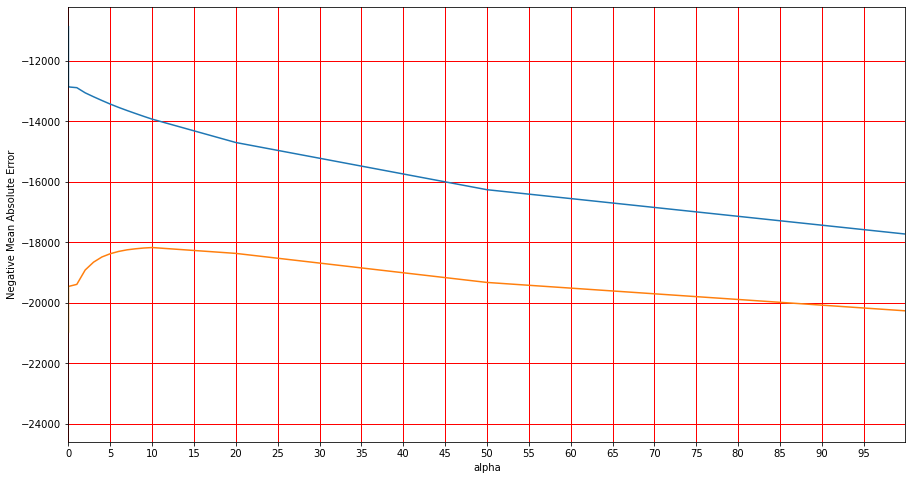

In [43]:
# Plotting the mean test and train scores

plt.figure(figsize=(15, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [44]:
# Setting alpha as 10, building a ridge regression model
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [45]:
# Predticting on X_train
y_train_pred_ridge = ridge.predict(X_train)

# Checking the r2_score
r2_score(y_train, y_train_pred_ridge)

0.9102708640356322

In [46]:
# Predicting on the X_test
y_test_pred_ridge = ridge.predict(X_test)

# Checking the r2_score
r2_score(y_test, y_test_pred_ridge)

0.8291066996854972

In [47]:
# checking the parameters of the Ridge Regression model
print(ridge.intercept_)
model_params_ridge = list(ridge.coef_)
model_params_ridge.insert(0, ridge.intercept_)
model_params_ridge = [round(x, 3) for x in model_params_ridge]
cols = X.columns
cols = cols.insert(0, 'constant')
sorted(list(zip(model_params_ridge, cols)), key=lambda x: abs(x[0]), reverse=True)

-358646.61392034416


[(-358646.614, 'constant'),
 (28515.5, 'RoofMatl_WdShngl'),
 (27042.781, 'Neighborhood_StoneBr'),
 (26168.788, 'OverallQual_9'),
 (22527.234, 'OverallQual_10'),
 (-19902.873, 'LotShape_IR3'),
 (19301.559, 'Neighborhood_NoRidge'),
 (-18810.805, 'KitchenQual_TA'),
 (-16924.258, 'KitchenQual_Gd'),
 (16369.044, 'Neighborhood_NridgHt'),
 (-14978.203, 'BsmtQual_Gd'),
 (14543.394, 'GarageCars'),
 (-13867.62, 'KitchenAbvGr'),
 (-13766.146, 'ExterQual_TA'),
 (13573.273, 'Functional_Typ'),
 (-13396.392, 'OverallQual_5'),
 (-12943.325, 'Neighborhood_SWISU'),
 (-12790.392, 'OverallCond_3'),
 (-12514.357, 'Neighborhood_Edwards'),
 (-12487.347, 'OverallQual_6'),
 (-12376.7, 'Exterior1st_Stucco'),
 (12273.504, 'BsmtExposure_Gd'),
 (-12054.172, 'BsmtQual_TA'),
 (11970.053, 'Exterior1st_BrkFace'),
 (-11813.314, 'OverallQual_4'),
 (11724.814, 'Neighborhood_Crawfor'),
 (-11568.08, 'MSSubClass_120'),
 (-11562.375, 'BldgType_TwnhsE'),
 (11403.382, 'SaleCondition_Partial'),
 (-11392.264, 'OverallCond_4'),
 

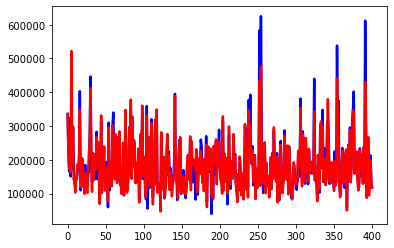

In [48]:
# plotting y_test v/s y_test_pred_ridge
ind = [i for i in range(0, y_test.shape[0], 1)]
plt.plot(ind, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(ind, y_test_pred_ridge, color='red', linewidth=2.5, linestyle='-')
plt.show()

----

## Performing Lasso Regression

In [49]:
lasso = Lasso()

model_cv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [50]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.112894,0.006689,0.003591,4.883831e-04,0.0001,{'alpha': 0.0001},-21872.883161,-20088.635953,-15758.484167,-22100.617383,-23774.529865,-20719.030106,2741.556195,27,-11014.843510,-10969.636627,-11409.193446,-10808.747474,-10180.463065,-10876.576824,400.158333
1,0.130648,0.013265,0.003790,1.163096e-03,0.001,{'alpha': 0.001},-21870.794562,-20074.675015,-15758.602678,-22101.634554,-23773.990146,-20715.939391,2741.967296,26,-11014.823078,-10969.657235,-11409.171924,-10808.767294,-10180.473683,-10876.578643,400.147784
2,0.118882,0.010430,0.003590,4.886750e-04,0.01,{'alpha': 0.01},-21853.162042,-20047.047702,-15759.788805,-22088.120018,-23768.549282,-20703.333570,2738.781932,25,-11014.781307,-10969.964927,-11409.182559,-10809.073822,-10180.647245,-10876.729972,400.091290
3,0.116688,0.003989,0.003789,3.988506e-04,0.05,{'alpha': 0.05},-21805.446311,-19904.263144,-15758.374652,-21975.046613,-23754.754126,-20639.576969,2728.145219,24,-11014.862267,-10971.405210,-11409.816441,-10810.589068,-10181.495347,-10877.633667,399.986708
4,0.107712,0.006705,0.003590,4.883635e-04,0.1,{'alpha': 0.1},-21759.386859,-19888.283670,-15747.021276,-21837.720518,-23743.697202,-20595.221905,2713.550830,23,-11015.059360,-10973.292894,-11410.715351,-10812.258962,-10182.767227,-10878.818759,399.829661
5,0.115292,0.004306,0.003590,4.885194e-04,0.2,{'alpha': 0.2},-21699.148113,-19856.033439,-15724.331734,-21840.449929,-23721.254567,-20568.243556,2713.287953,22,-11015.806586,-10977.153677,-11412.628570,-10815.591536,-10185.302316,-10881.296537,399.579873
6,0.111701,0.008078,0.003590,4.884805e-04,0.3,{'alpha': 0.3},-21638.447900,-19831.606350,-15702.257317,-21778.300087,-23698.927419,-20529.907815,2706.431743,21,-11016.474511,-10981.118096,-11414.497223,-10818.820861,-10187.697744,-10883.721687,399.372880
7,0.113505,0.008144,0.005186,2.917863e-03,0.4,{'alpha': 0.4},-21578.067745,-19810.349482,-15681.200050,-21720.070319,-23677.037628,-20493.345045,2699.651796,20,-11017.270497,-10984.927931,-11415.918104,-10822.206870,-10190.348896,-10886.134460,398.956591
8,0.110704,0.006433,0.003391,4.889865e-04,0.5,{'alpha': 0.5},-21522.131199,-19789.656761,-15659.642379,-21679.829378,-23652.209495,-20460.693842,2694.405270,19,-11018.596462,-10988.728491,-11417.081906,-10825.388254,-10192.835743,-10888.526171,398.572834
9,0.111701,0.004592,0.003790,3.991128e-04,0.6,{'alpha': 0.6},-21469.545731,-19770.612170,-15638.660396,-21652.376568,-23627.000449,-20431.639063,2690.255964,18,-11020.288917,-10992.386796,-11417.838093,-10829.405343,-10195.637751,-10891.111380,397.963762


In [51]:
model_cv.best_params_

{'alpha': 100}

In [52]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int64')

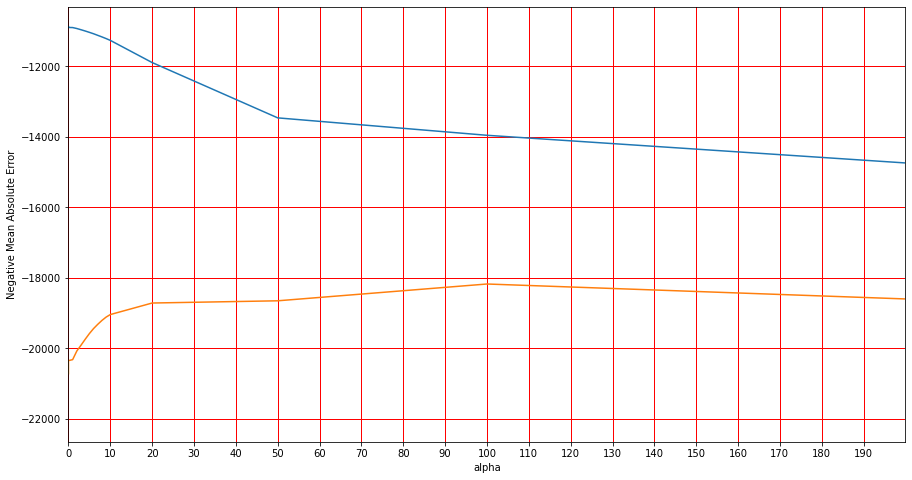

In [53]:
# Plotting the mean test and train scores
plt.figure(figsize=(15, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [54]:
# Setting alpha as 100, building a lasso regression model
alpha = 100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [55]:
# Predicting on X_train
y_train_pred_lasso = lasso.predict(X_train)

# Checking the r2_score
r2_score(y_train, y_train_pred_lasso)

0.9127400949466069

In [56]:
# Predicting on X_test
y_test_pred_lasso = lasso.predict(X_test)

# Checking the r2_score
r2_score(y_test, y_test_pred_lasso)

0.8226115465655931

In [57]:
# checking the parameters of the Lasso Regression model
model_params_lasso = list(lasso.coef_)
model_params_lasso.insert(0, lasso.intercept_)
model_params_lasso = [round(x, 3) for x in model_params_lasso]
cols = X.columns
cols = cols.insert(0, 'constant')
lasso_selected_features = []
for k, v in sorted(list(zip(model_params_lasso, cols)), key=lambda x:abs(x[0]), reverse=True)[1:131]:
    lasso_selected_features.append(v)
sorted(list(zip(model_params_lasso, cols)), key=lambda x: abs(x[0]), reverse=True)

[(-1586516.611, 'constant'),
 (70839.234, 'RoofMatl_WdShngl'),
 (53343.494, 'OverallQual_10'),
 (45121.688, 'OverallQual_9'),
 (-43831.323, 'LotShape_IR3'),
 (40420.806, 'Neighborhood_StoneBr'),
 (27555.031, 'Neighborhood_NoRidge'),
 (22722.148, 'SaleCondition_Partial'),
 (21939.529, 'Neighborhood_NridgHt'),
 (-20124.624, 'KitchenAbvGr'),
 (-19233.999, 'KitchenQual_TA'),
 (-18166.271, 'OverallCond_3'),
 (-16982.411, 'KitchenQual_Gd'),
 (-16743.144, 'OverallCond_4'),
 (-16647.628, 'Exterior1st_Stucco'),
 (15097.117, 'Neighborhood_Crawfor'),
 (-14228.874, 'BldgType_TwnhsE'),
 (13972.23, 'GarageCars'),
 (-13942.52, 'BsmtQual_Gd'),
 (13275.448, 'OverallQual_8'),
 (13116.707, 'BsmtExposure_Gd'),
 (-13116.102, 'Neighborhood_SWISU'),
 (12960.936, 'Functional_Typ'),
 (-12798.205, 'BldgType_Twnhs'),
 (11458.26, 'Exterior1st_BrkFace'),
 (-11107.081, 'BsmtQual_TA'),
 (-10888.329, 'Neighborhood_Edwards'),
 (10709.009, 'MSSubClass_70'),
 (10616.819, 'LotConfig_CulDSac'),
 (-10615.993, 'HouseStyle_2

In [58]:
lasso_selected_features

['RoofMatl_WdShngl',
 'OverallQual_10',
 'OverallQual_9',
 'LotShape_IR3',
 'Neighborhood_StoneBr',
 'Neighborhood_NoRidge',
 'SaleCondition_Partial',
 'Neighborhood_NridgHt',
 'KitchenAbvGr',
 'KitchenQual_TA',
 'OverallCond_3',
 'KitchenQual_Gd',
 'OverallCond_4',
 'Exterior1st_Stucco',
 'Neighborhood_Crawfor',
 'BldgType_TwnhsE',
 'GarageCars',
 'BsmtQual_Gd',
 'OverallQual_8',
 'BsmtExposure_Gd',
 'Neighborhood_SWISU',
 'Functional_Typ',
 'BldgType_Twnhs',
 'Exterior1st_BrkFace',
 'BsmtQual_TA',
 'Neighborhood_Edwards',
 'MSSubClass_70',
 'LotConfig_CulDSac',
 'HouseStyle_2Story',
 'BsmtQual_Fa',
 'Condition1_Feedr',
 'MSSubClass_120',
 'BsmtFinType1_GLQ',
 'BsmtFinType2_Rec',
 'HouseStyle_1Story',
 'OverallCond_5',
 'OverallQual_5',
 'SaleCondition_Alloca',
 'Exterior2nd_Wd Shng',
 'BsmtFinType1_Unf',
 'RoofMatl_CompShg',
 'SaleCondition_Normal',
 'Exterior2nd_Stucco',
 'OverallQual_4',
 'ExterQual_TA',
 'Fireplaces',
 'OverallQual_6',
 'GarageQual_Fa',
 'Neighborhood_Somerst',
 '

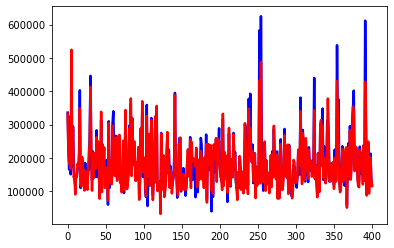

In [59]:
# Plotting y_test v/s y_test_pred_lasso
ind = [i for i in range(0, y_test.shape[0], 1)]
plt.plot(ind, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(ind, y_test_pred_lasso, color='red', linewidth=2.5, linestyle='-')
plt.show()

----

#### Based on the r2_score of the 3 models, we can see that their r2_scores are almost similar, as such it is better to go for the simplest model. In this case it would be better to go with Lasso as it panalizes the variables, and helps in feature selection.

#### The optimum value of lambda for Ridge Regression comes out to be as 10 while the optimum value of lambda for Lasso Regression comes out to be 100.

#### The top 30 most important features using lasso are:

In [60]:
for feature in lasso_selected_features[:31]:
    print(f"- {feature}")

- RoofMatl_WdShngl
- OverallQual_10
- OverallQual_9
- LotShape_IR3
- Neighborhood_StoneBr
- Neighborhood_NoRidge
- SaleCondition_Partial
- Neighborhood_NridgHt
- KitchenAbvGr
- KitchenQual_TA
- OverallCond_3
- KitchenQual_Gd
- OverallCond_4
- Exterior1st_Stucco
- Neighborhood_Crawfor
- BldgType_TwnhsE
- GarageCars
- BsmtQual_Gd
- OverallQual_8
- BsmtExposure_Gd
- Neighborhood_SWISU
- Functional_Typ
- BldgType_Twnhs
- Exterior1st_BrkFace
- BsmtQual_TA
- Neighborhood_Edwards
- MSSubClass_70
- LotConfig_CulDSac
- HouseStyle_2Story
- BsmtQual_Fa
- Condition1_Feedr


#### From these we can understand the major features from the initials columns that influence the Sales Price

#### Some of the major influencers are:
- __OverallQual__
- __OverAllCond__
- __Neighborhood__
- __KitchenQual__
- __BsmtQual__
- __SaleCondition__
- __GarageCars__